In [1]:
import os
import torch
import math
import numpy as np
import gpytorch
import time
import matplotlib.pyplot as plt
from model import FancyGPWithPriors
from optimizer import get_next_points
from target_function import target_function2
from target_function import measure

In [10]:
X_bounds = torch.tensor([-2.0, 2.0])
train_x = torch.empty(2).uniform_(X_bounds[0], X_bounds[1])
# True function is sin(2*pi*x) with Gaussian noise
train_y = measure(train_x, noise = 0.01)
# train_y = -torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)

test_x = torch.linspace(-2, 2, 200)
test_y = measure(test_x, noise = 0.01)
# test_y = -torch.sin(test_x * (2 * math.pi)) + torch.randn(test_x.size()) * math.sqrt(0.04)
noise, lengthscale, outputscale = 0.01, 0.05, 0.1
# bad priors
# noise, lengthscale, outputscale = 12., 0.5, 2. 

### Documentation for:
- Gaussian process model, beyes rule, formulation
- kernel function
- acquisition function

Initial model parameters
0.010000001639127731 0.05000000447034836 0.10000000149011612
Iter 1/20 - Loss: 131.054   lengthscale: 0.050   noise: 0.010
Iter 2/20 - Loss: 130.883   lengthscale: 0.050   noise: 0.010
Iter 3/20 - Loss: 130.712   lengthscale: 0.050   noise: 0.010
Iter 4/20 - Loss: 130.541   lengthscale: 0.050   noise: 0.010
Iter 5/20 - Loss: 130.370   lengthscale: 0.050   noise: 0.010
Iter 6/20 - Loss: 130.199   lengthscale: 0.050   noise: 0.010
Iter 7/20 - Loss: 130.029   lengthscale: 0.050   noise: 0.010
Iter 8/20 - Loss: 129.859   lengthscale: 0.050   noise: 0.010
Iter 9/20 - Loss: 129.689   lengthscale: 0.050   noise: 0.010
Iter 10/20 - Loss: 129.520   lengthscale: 0.050   noise: 0.010
Iter 11/20 - Loss: 129.350   lengthscale: 0.050   noise: 0.010
Iter 12/20 - Loss: 129.181   lengthscale: 0.051   noise: 0.010
Iter 13/20 - Loss: 129.013   lengthscale: 0.051   noise: 0.010
Iter 14/20 - Loss: 128.844   lengthscale: 0.051   noise: 0.010
Iter 15/20 - Loss: 128.676   lengthscale:

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


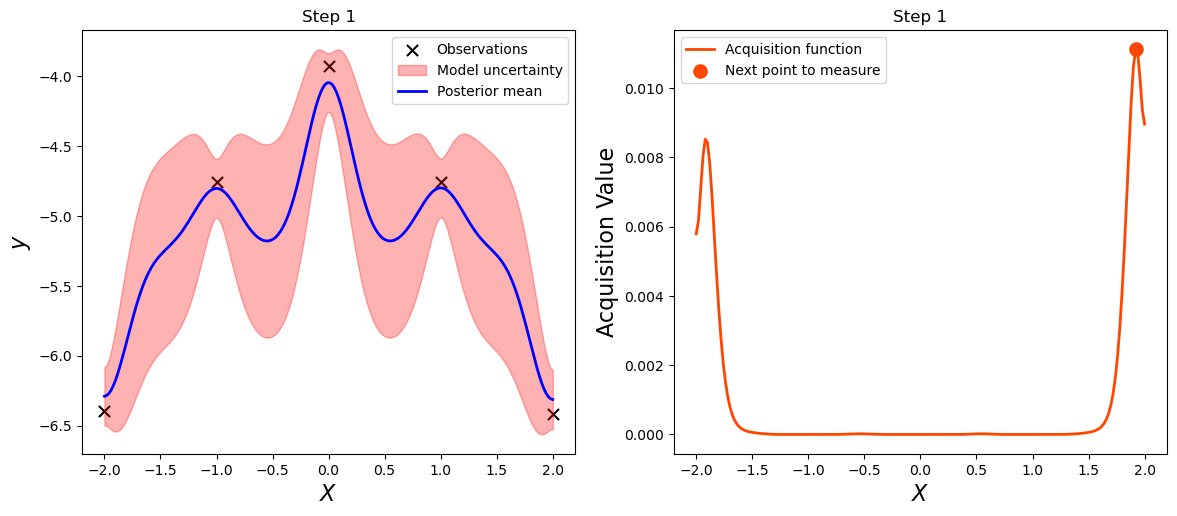


Step 2/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


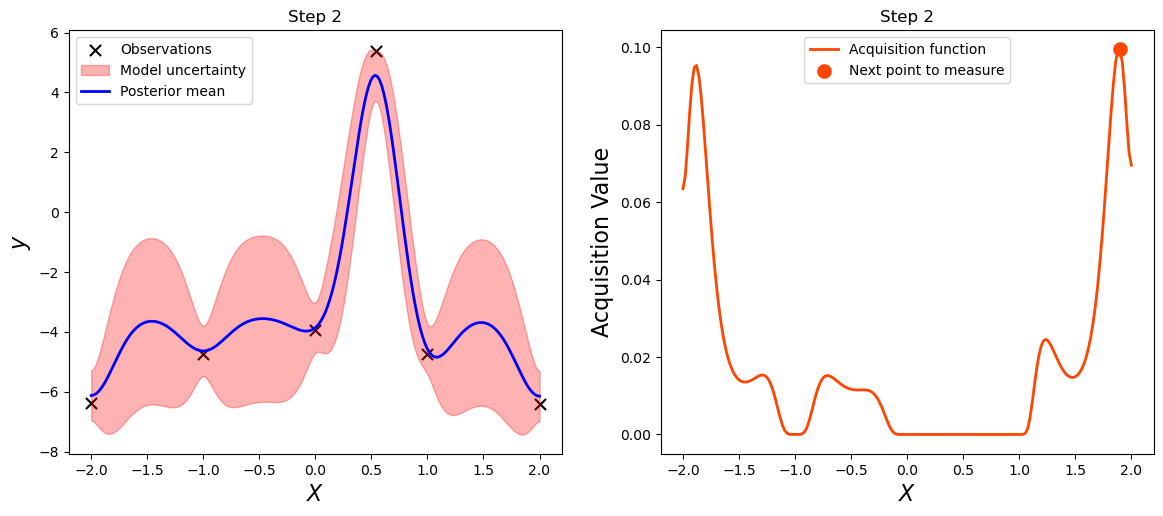


Step 3/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


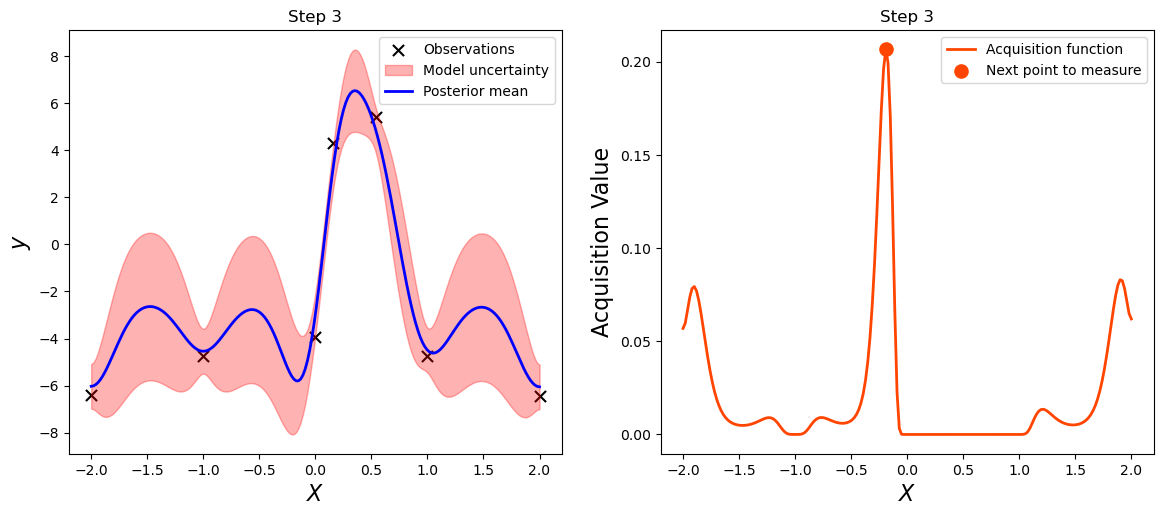


Step 4/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


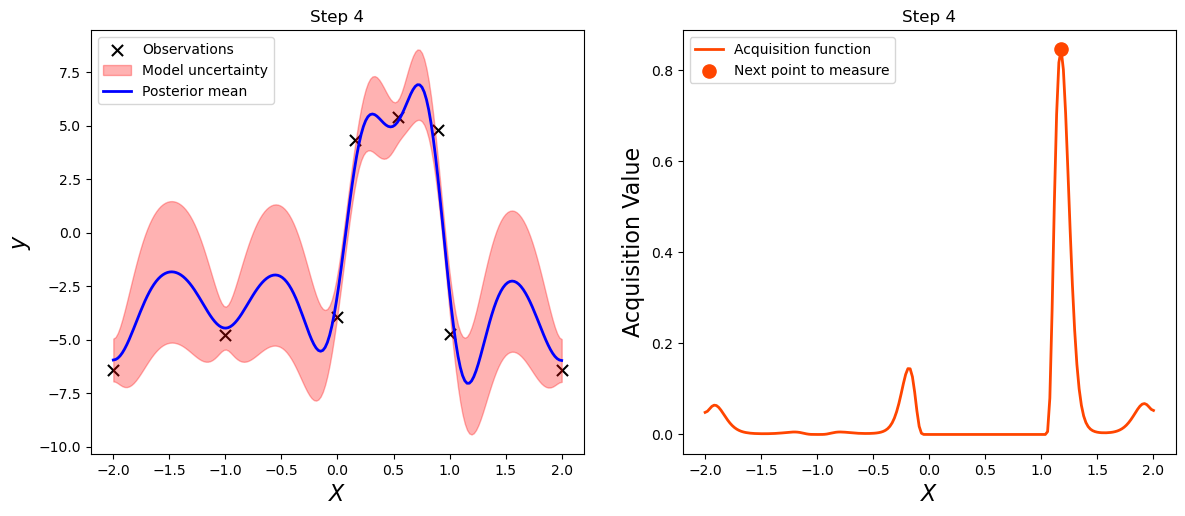


Step 5/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


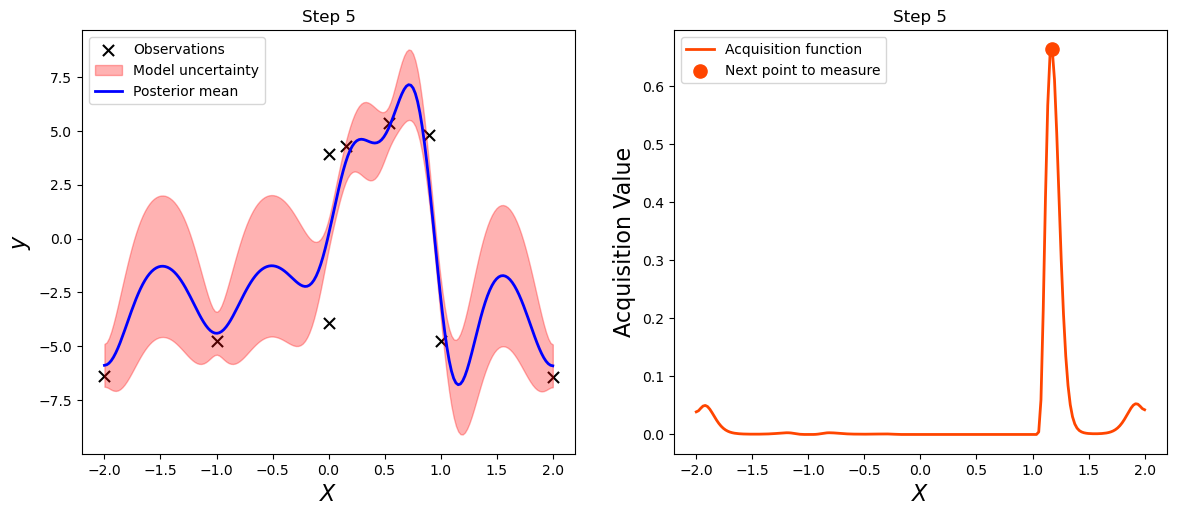


Step 6/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


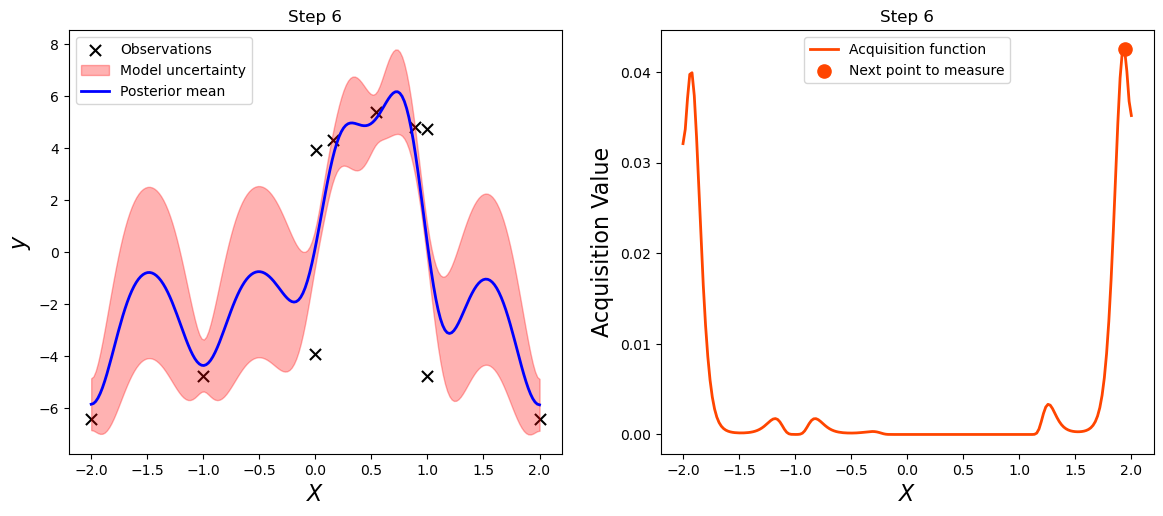


Step 7/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


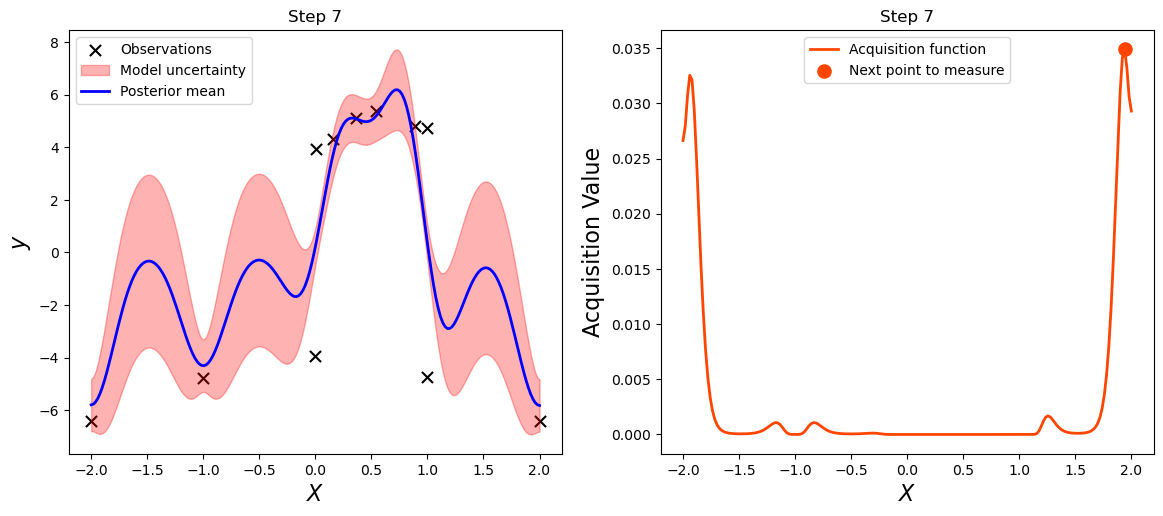


Step 8/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


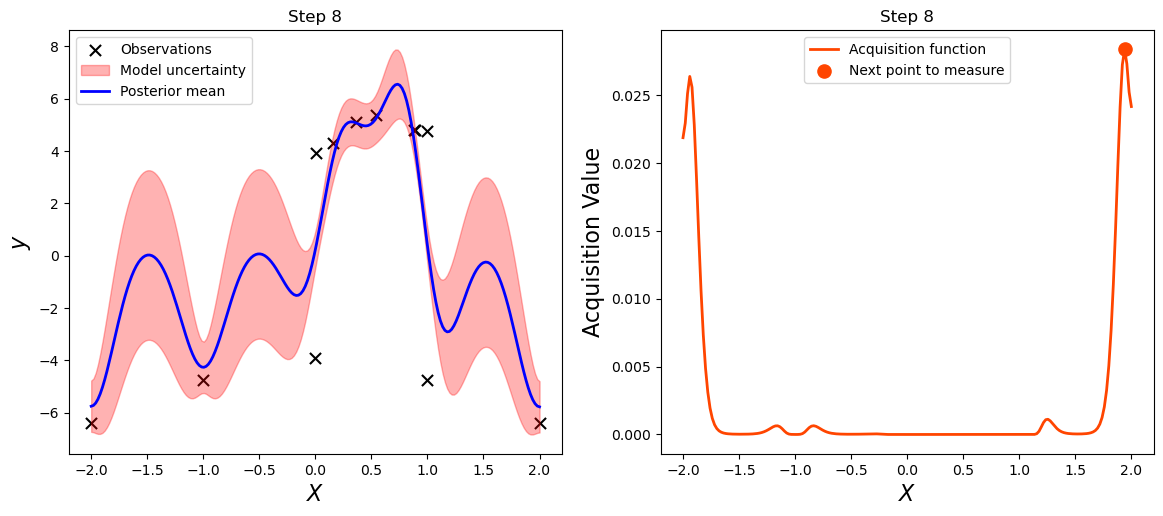


Step 9/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


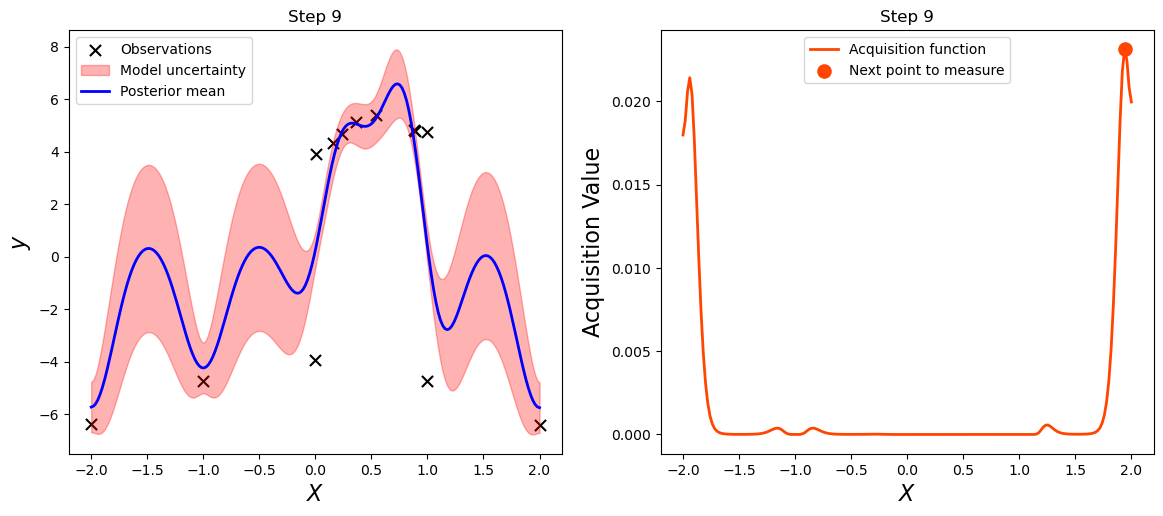


Step 10/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


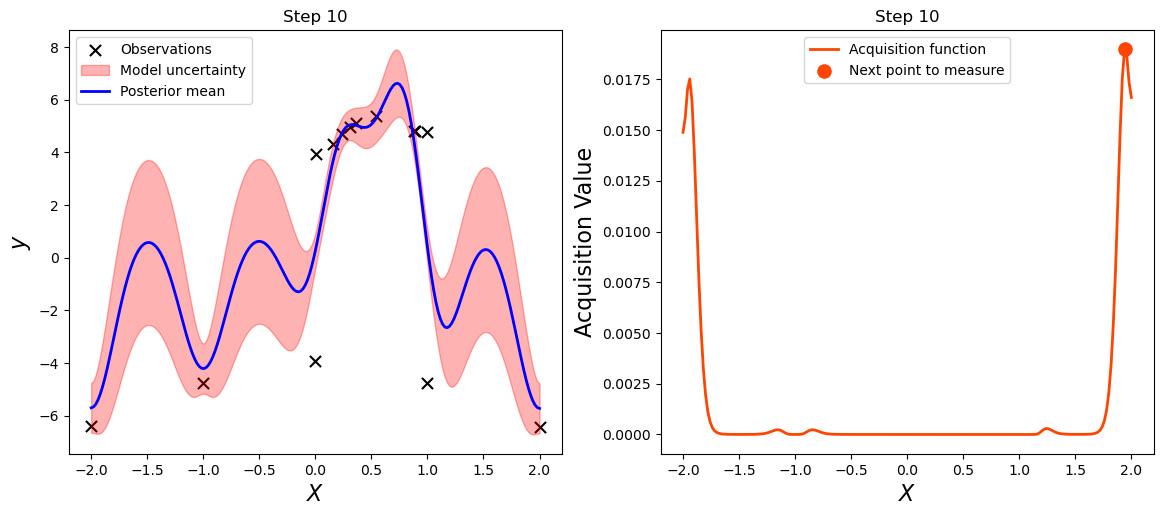


Step 11/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


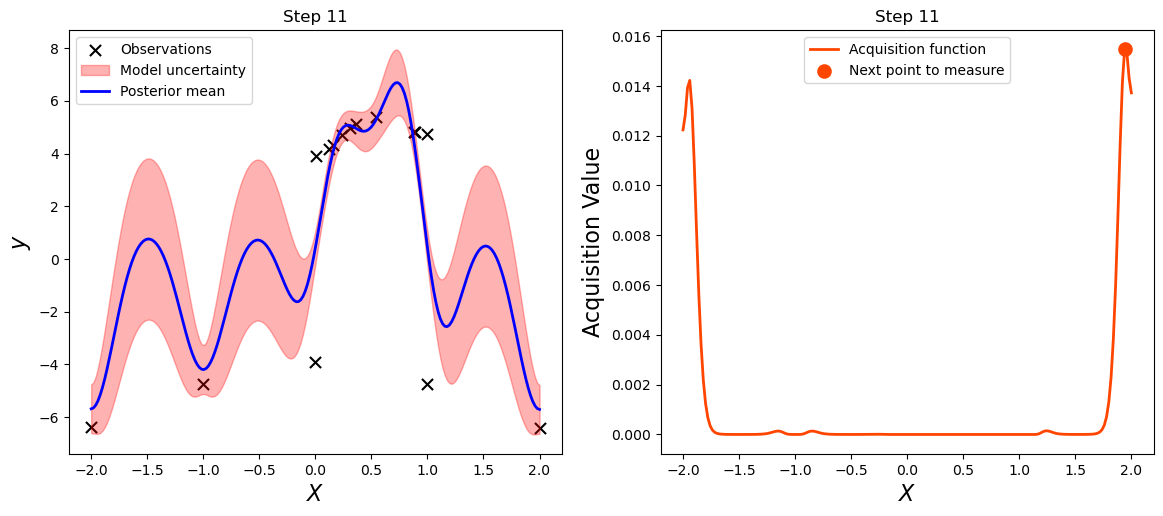


Step 12/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


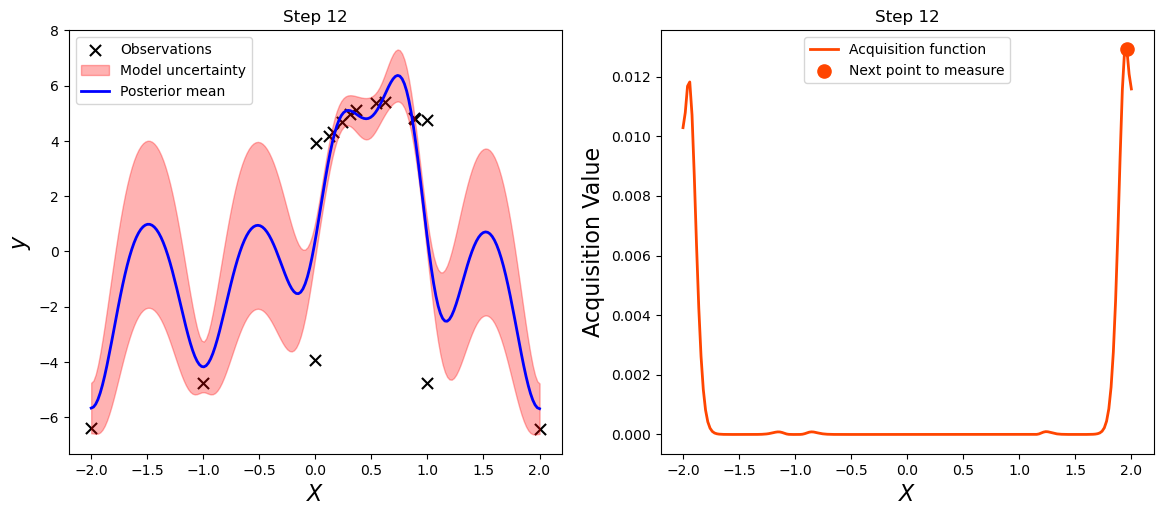


Step 13/20


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


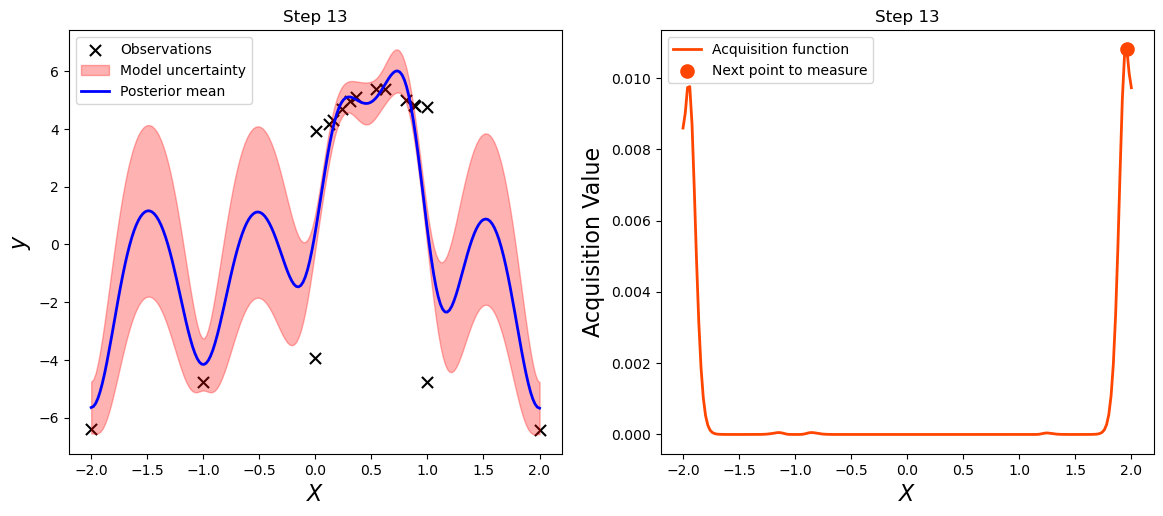


Step 14/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


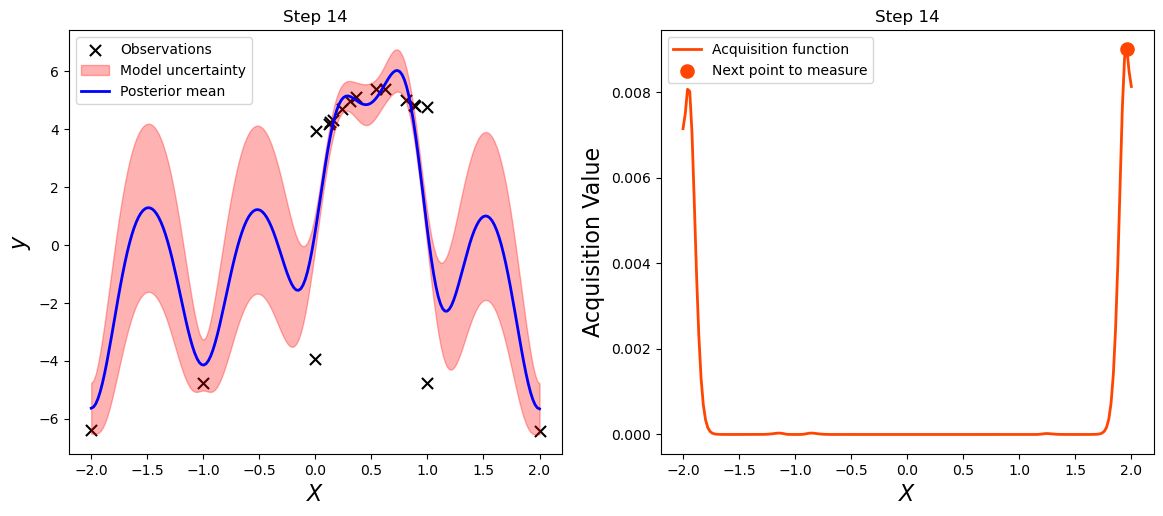


Step 15/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


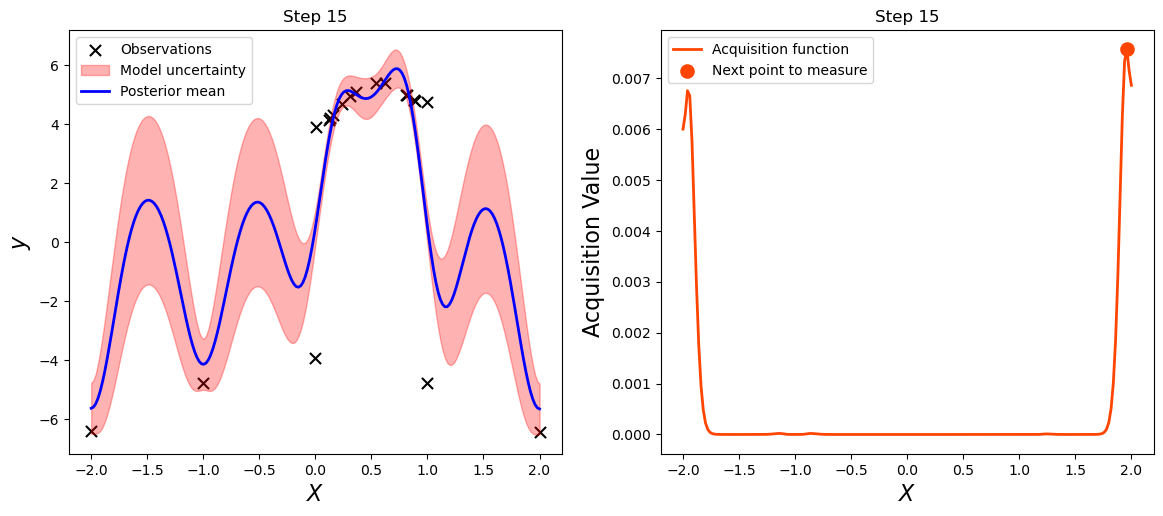


Step 16/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


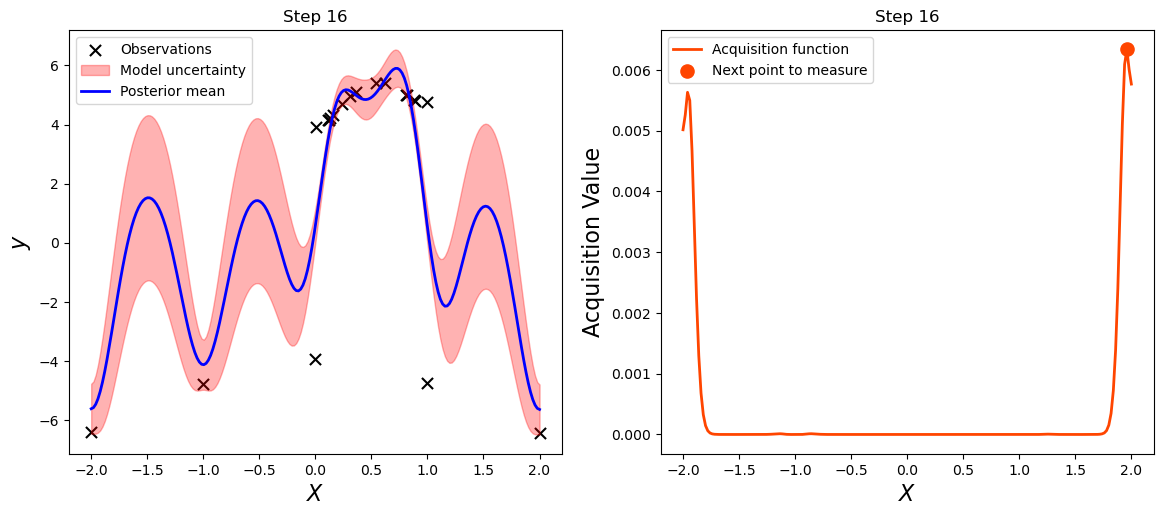


Step 17/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


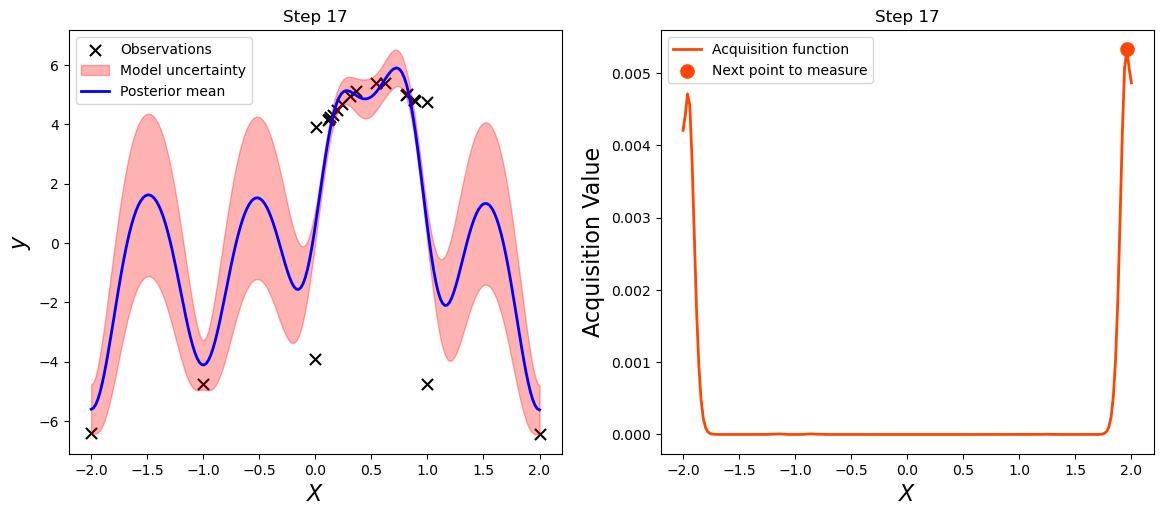


Step 18/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


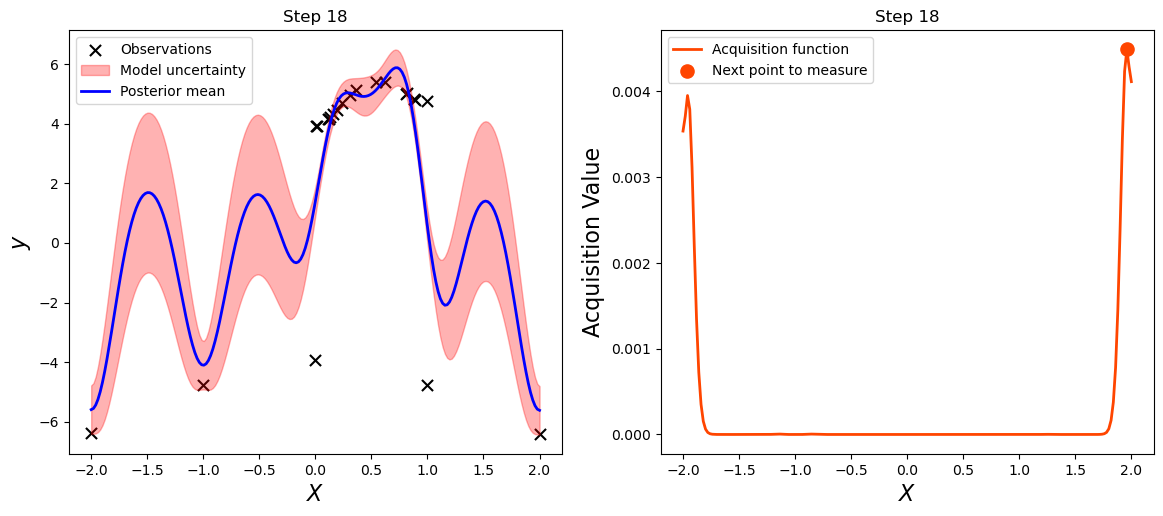


Step 19/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


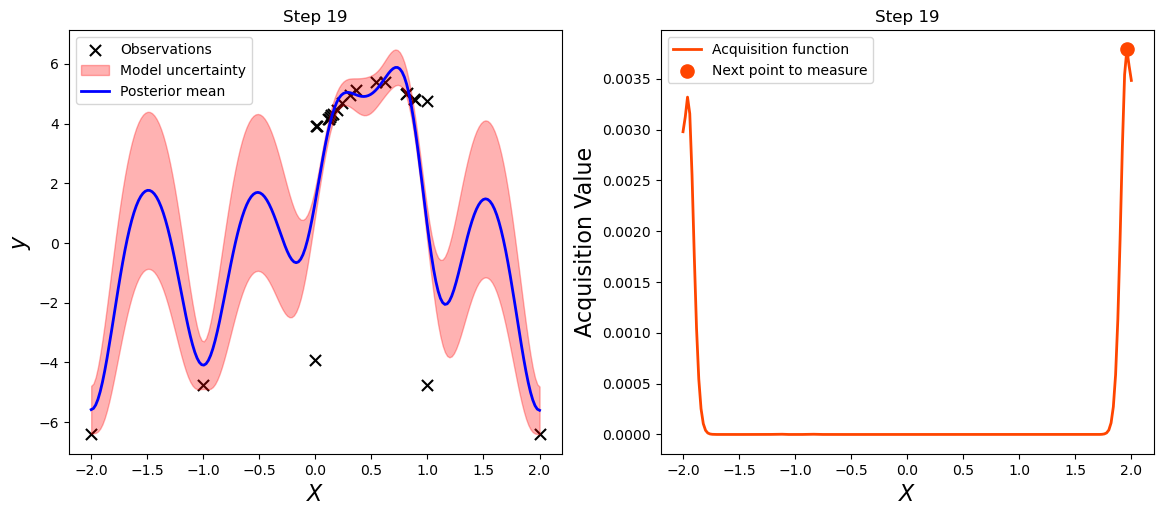


Step 20/20
Best y value: -6.418640613555908


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


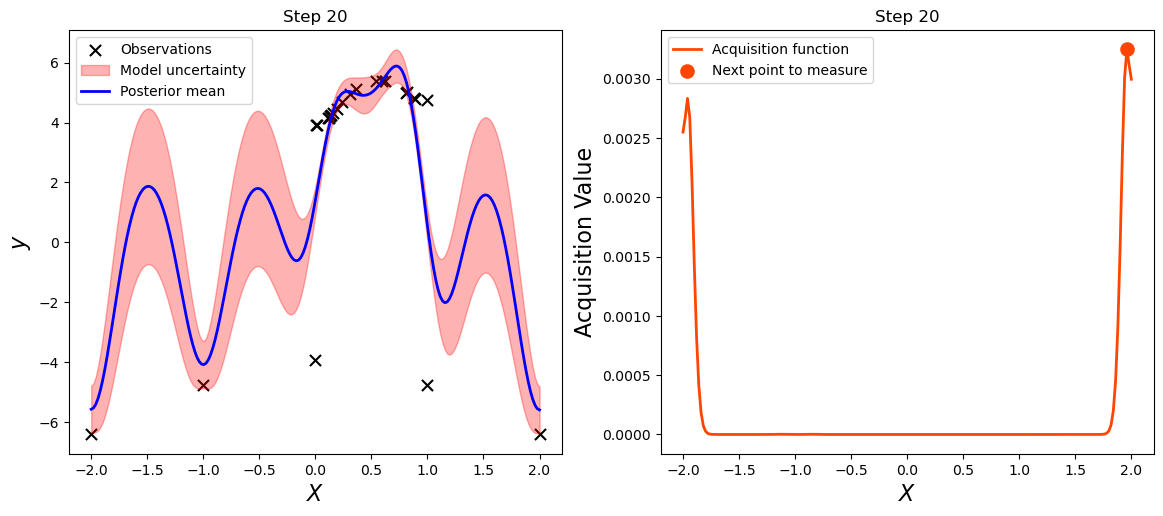

Script execution time: 0.04 min


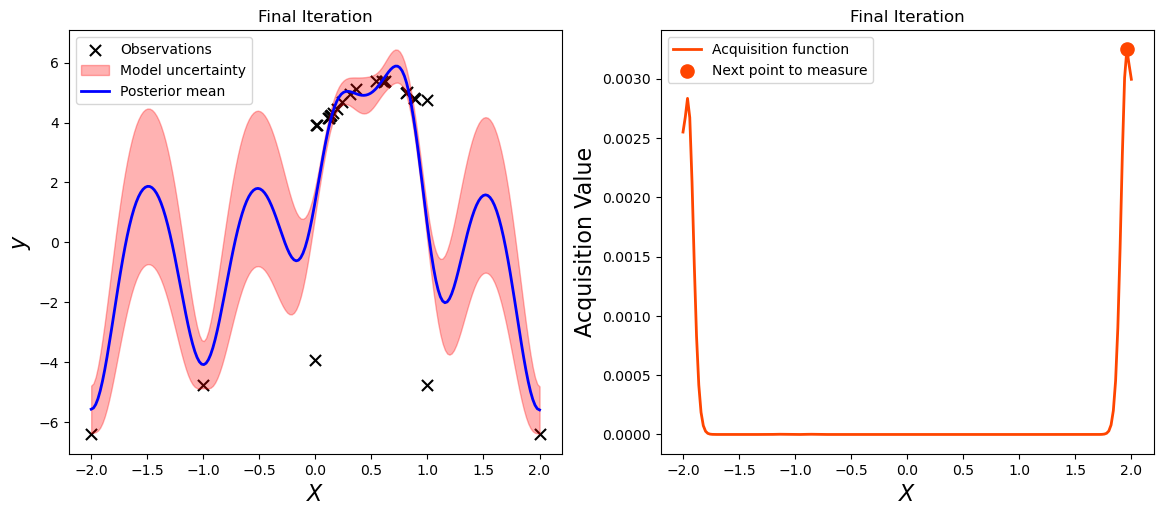

In [20]:
print('Initial model parameters')
    
likelihood = gpytorch.likelihoods.GaussianLikelihood(
    noise_constraint=gpytorch.constraints.GreaterThan(1e-4),
)

model = FancyGPWithPriors(train_x, train_y, likelihood)

hypers = {
    'likelihood.noise_covar.noise': torch.tensor(noise),
    'covar_module.base_kernel.lengthscale': torch.tensor(lengthscale),
    'covar_module.outputscale': torch.tensor(outputscale),
}

model.initialize(**hypers)
print(
    model.likelihood.noise_covar.noise.item(),
    model.covar_module.base_kernel.lengthscale.item(),
    model.covar_module.outputscale.item()
)

model_init_p1 = round(model.likelihood.noise_covar.noise.item(), 2)
model_init_p2 = round(model.covar_module.base_kernel.lengthscale.item(), 1)
model_init_p3 = round(model.covar_module.outputscale.item(), 1)

model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(-2, 2, 200)
    observed_pred_untrain = likelihood(model(test_x))

with torch.no_grad():
    lower_init, upper_init = observed_pred_untrain.confidence_region()

training_iter = 20

model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))

with torch.no_grad():  
    lower, upper = observed_pred.confidence_region()

init_x = train_x.unsqueeze(1)
init_y = train_y.unsqueeze(1)
best_init_y = train_y.min().item()
bounds = torch.tensor([[0.],[1.]])

start_time = time.time()

num_steps = 20  # number of Bayesian optimization steps

# Ensure the Results folder exists
os.makedirs('Results', exist_ok=True)

for e in range(num_steps):
    print("\nStep {}/{}".format(e + 1, num_steps))
    
    # Bayesian optimization step
    new_candidates, ac_values, model_final, ac_func = get_next_points(init_x, init_y, best_init_y, model, likelihood, bounds, batch_size=1)
    new_results = measure(new_candidates)
    
    init_x = torch.cat([init_x, new_candidates])
    init_y = torch.cat([init_y, new_results])

    best_init_y = init_y.min().item()
    print("Best y value:", best_init_y)
    
    # Generate plot for this iteration
    xx = torch.linspace(-2, 2, 200).unsqueeze(-1)
    x = init_x.numpy()
    y = init_y.numpy()
    
    with torch.no_grad():
        posterior = model_final.posterior(X=xx.unsqueeze(1))
        
    ymean = posterior.mean.squeeze(-1).numpy()
    yvar = posterior.variance.squeeze(-1).numpy()
    acq = ac_func(xx.unsqueeze(1)).detach().numpy()
    
    # Get bounds for uncertainty
    lower_b = ymean - 1.96 * np.sqrt(yvar)
    upper_b = ymean + 1.96 * np.sqrt(yvar)
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 5.5))
    
    ax1.scatter(x[:-1], y[:-1], marker='x', c='k', label="Observations", s=64)
    ax1.fill_between(xx.squeeze().numpy(), lower_b.squeeze(), upper_b.squeeze(), color='r', alpha=0.3, label="Model uncertainty")
    ax1.plot(xx.squeeze().numpy(), ymean, lw=2, c='b', label='Posterior mean')
    # ax1.plot(xx.squeeze().numpy(), ground_truth, label='Ground truth')
    ax1.set_xlabel("$X$", fontsize=16)
    ax1.set_ylabel("$y$", fontsize=16)
    ax1.legend(loc='best', fontsize=10)
    ax1.set_title(f'Step {e + 1}')
    
    idx = acq.argmax()
    ax2.plot(xx.squeeze().numpy(), acq, lw=2, c='orangered', label='Acquisition function')
    ax2.scatter(xx.squeeze().numpy()[idx], acq[idx], s=90, c='orangered', label='Next point to measure')
    ax2.set_xlabel("$X$", fontsize=16)
    ax2.set_ylabel("Acquisition Value", fontsize=16)
    ax2.legend(loc='best', fontsize=10)
    ax2.set_title(f'Step {e + 1}')
    
    # plt.savefig(f'Results/iteration_{e + 1}.png')
    plt.show()
    # plt.close(fig)  # Close the figure to free up memory

end_time = time.time()
running_time = end_time - start_time

print("Script execution time: {:.2f} min".format(round(running_time/60, 2)))

# Final plot after all iterations
xx = torch.linspace(-2, 2, 200).unsqueeze(-1)
x = init_x.numpy()
y = init_y.numpy()

with torch.no_grad():
    posterior = model_final.posterior(X=xx.unsqueeze(1))
    
ymean = posterior.mean.squeeze(-1).numpy()
yvar = posterior.variance.squeeze(-1).numpy()
acq = ac_func(xx.unsqueeze(1)).detach().numpy()

# Get bounds for uncertainty
lower_b = ymean - 1.96 * np.sqrt(yvar)
upper_b = ymean + 1.96 * np.sqrt(yvar)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 5.5))

ax1.scatter(x, y, marker='x', c='k', label="Observations", s=64)
ax1.fill_between(xx.squeeze().numpy(), lower_b.squeeze(), upper_b.squeeze(), color='r', alpha=0.3, label="Model uncertainty")
ax1.plot(xx.squeeze().numpy(), ymean, lw=2, c='b', label='Posterior mean')
# ax1.plot(xx.squeeze().numpy(), ground_truth, label='Ground truth')
ax1.set_xlabel("$X$", fontsize=16)
ax1.set_ylabel("$y$", fontsize=16)
ax1.legend(loc='best', fontsize=10)
ax1.set_title('Final Iteration')

idx = acq.argmax()
ax2.plot(xx.squeeze().numpy(), acq, lw=2, c='orangered', label='Acquisition function')
ax2.scatter(xx.squeeze().numpy()[idx], acq[idx], s=90, c='orangered', label='Next point to measure')
ax2.set_xlabel("$X$", fontsize=16)
ax2.set_ylabel("Acquisition Value", fontsize=16)
ax2.legend(loc='best', fontsize=10)
ax2.set_title('Final Iteration')

# plt.savefig('Results/final_iteration.png')
plt.show()
# plt.close(fig)

Initial model parameters
0.010000001639127731 0.05000000447034836 0.10000000149011612
Iter 1/20 - Loss: 117.320   lengthscale: 0.050   noise: 0.010
Iter 2/20 - Loss: 115.782   lengthscale: 0.050   noise: 0.010
Iter 3/20 - Loss: 114.266   lengthscale: 0.051   noise: 0.010
Iter 4/20 - Loss: 112.770   lengthscale: 0.051   noise: 0.010
Iter 5/20 - Loss: 111.295   lengthscale: 0.052   noise: 0.010
Iter 6/20 - Loss: 109.841   lengthscale: 0.052   noise: 0.011
Iter 7/20 - Loss: 108.408   lengthscale: 0.053   noise: 0.011
Iter 8/20 - Loss: 106.995   lengthscale: 0.054   noise: 0.011
Iter 9/20 - Loss: 105.604   lengthscale: 0.054   noise: 0.011
Iter 10/20 - Loss: 104.234   lengthscale: 0.055   noise: 0.011
Iter 11/20 - Loss: 102.884   lengthscale: 0.055   noise: 0.011
Iter 12/20 - Loss: 101.555   lengthscale: 0.056   noise: 0.011
Iter 13/20 - Loss: 100.247   lengthscale: 0.056   noise: 0.011
Iter 14/20 - Loss: 98.960   lengthscale: 0.057   noise: 0.011
Iter 15/20 - Loss: 97.693   lengthscale: 0

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


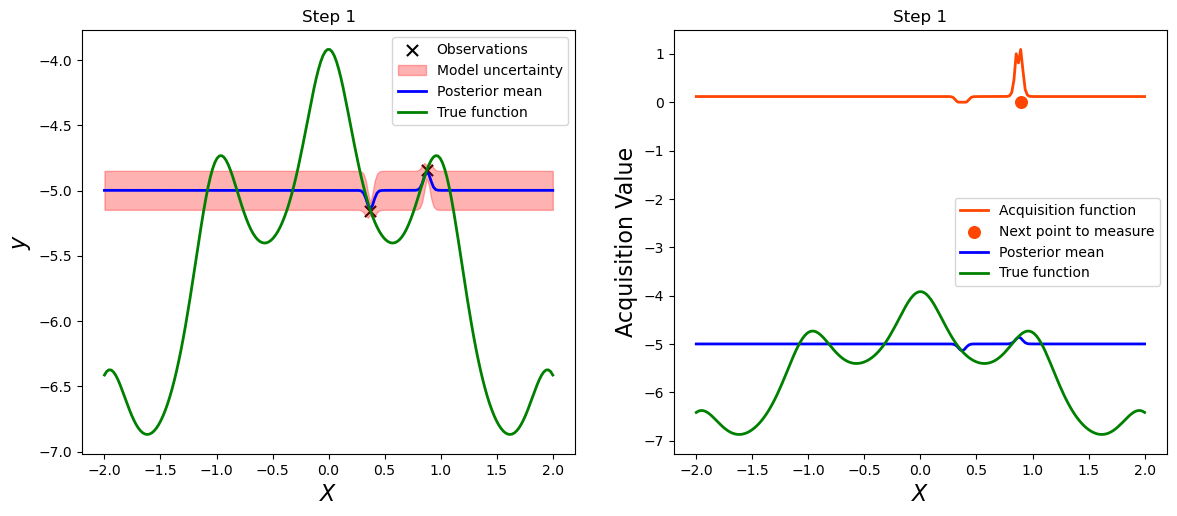


Step 2/50
Best y value: -4.77164363861084


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


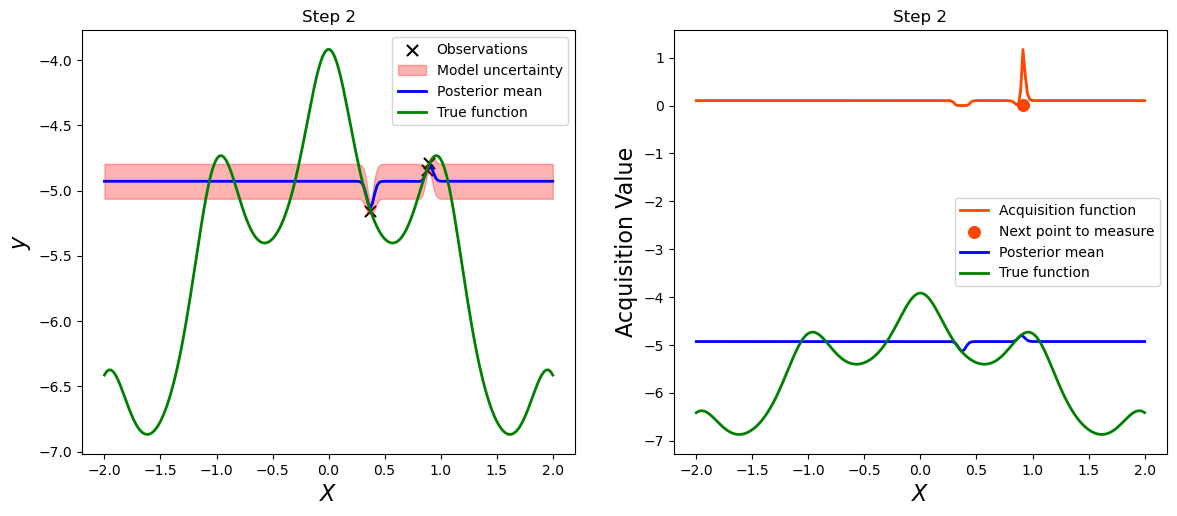


Step 3/50
Best y value: -4.7476396560668945


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


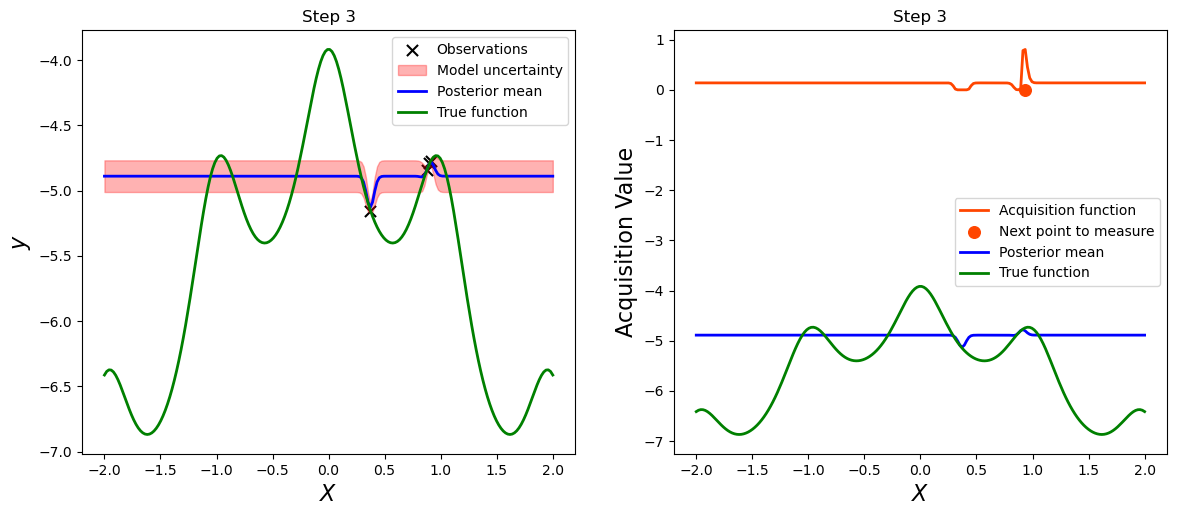


Step 4/50
Best y value: -4.7366180419921875


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


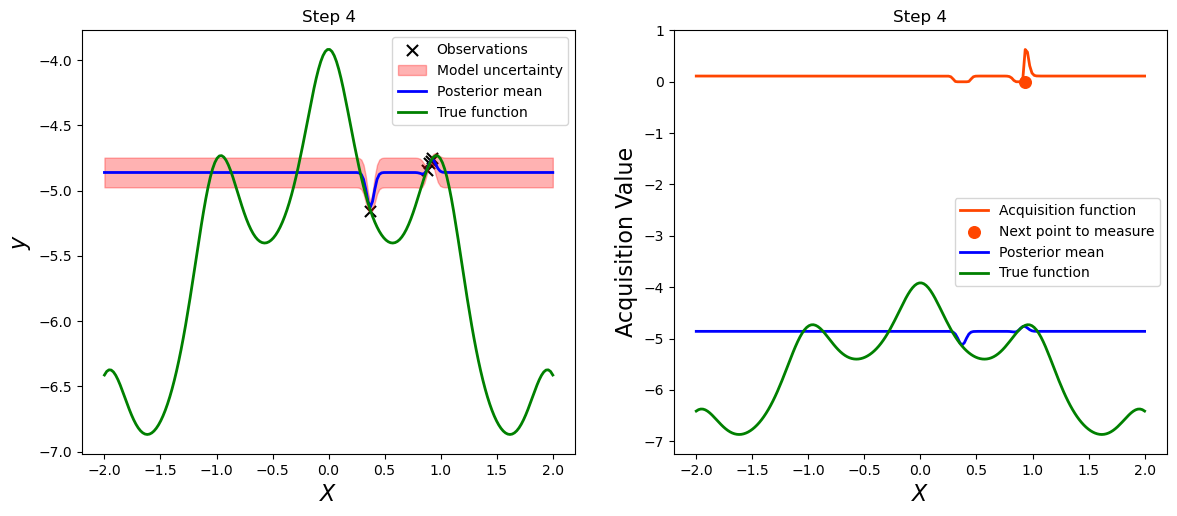


Step 5/50
Best y value: -4.7366180419921875


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


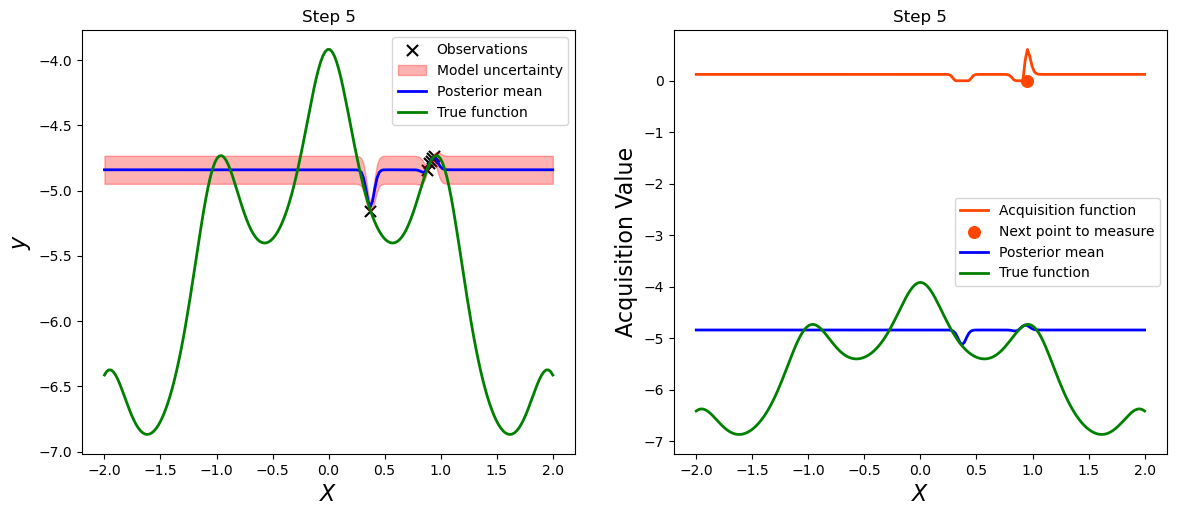


Step 6/50


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


Best y value: -4.73313570022583


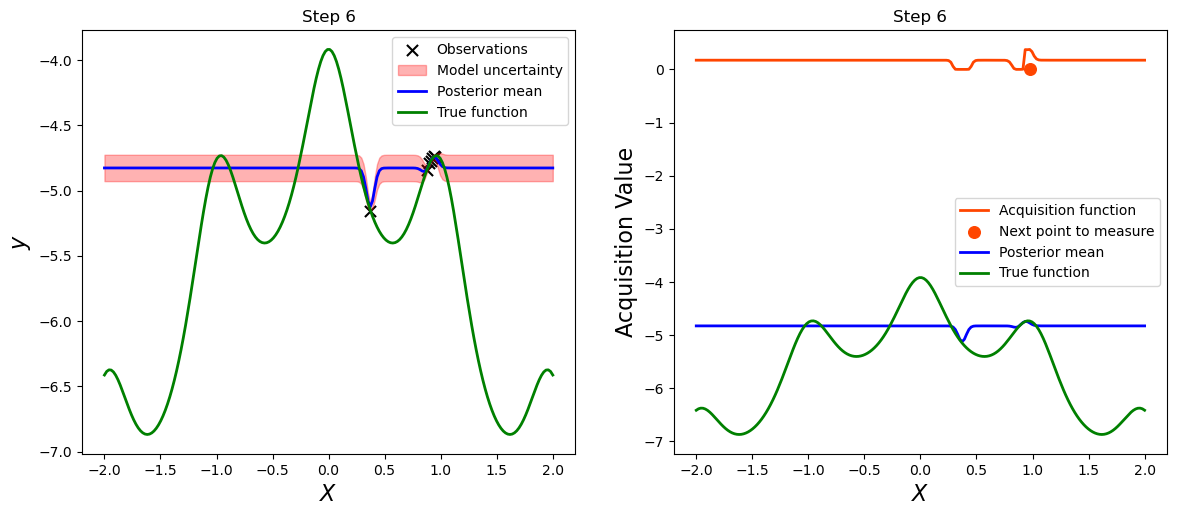


Step 7/50
Best y value: -4.73313570022583


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


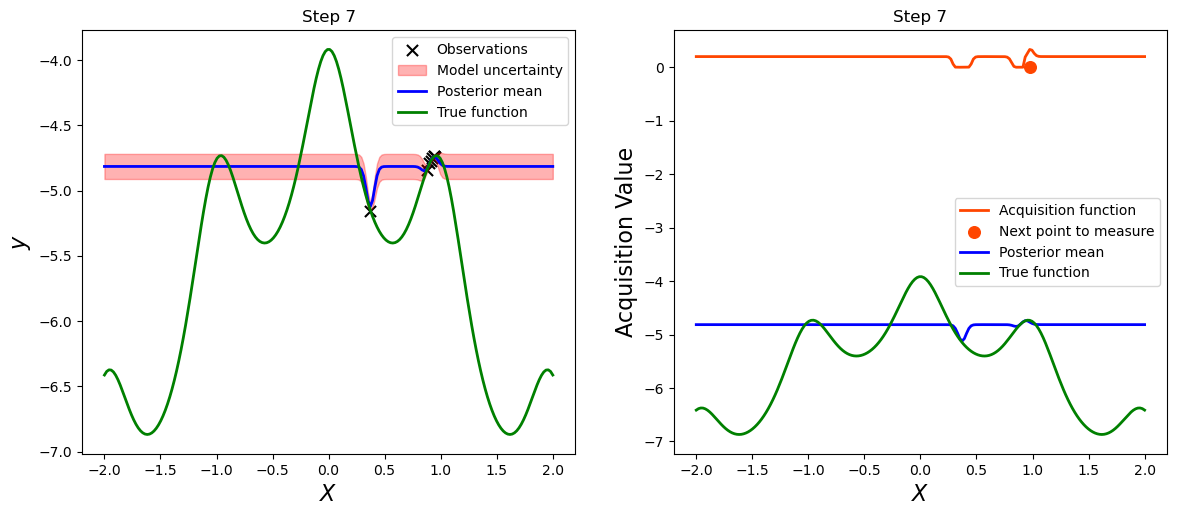


Step 8/50
Best y value: -4.73313570022583


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


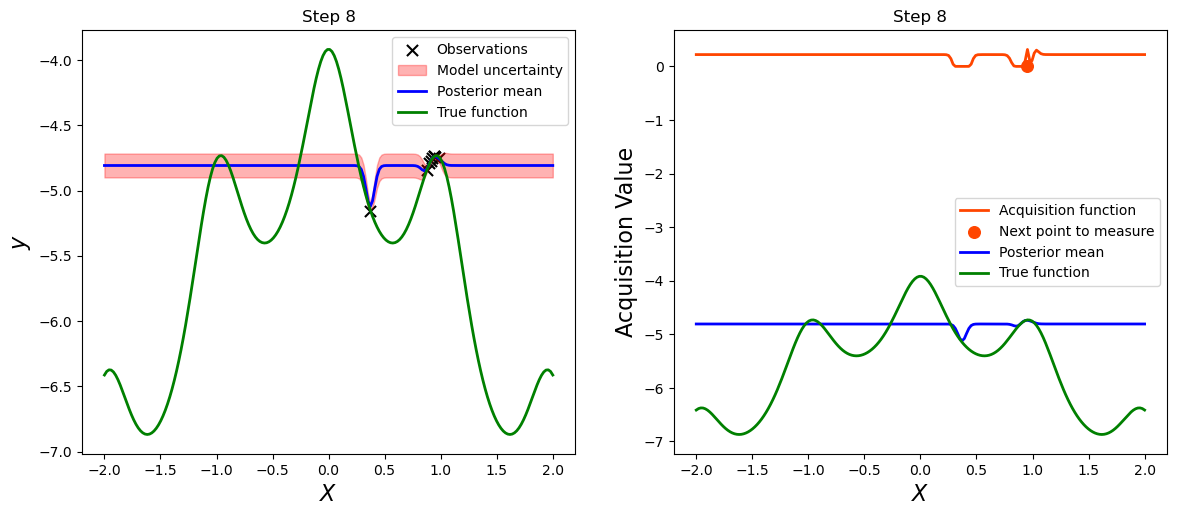


Step 9/50
Best y value: -4.73313570022583


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


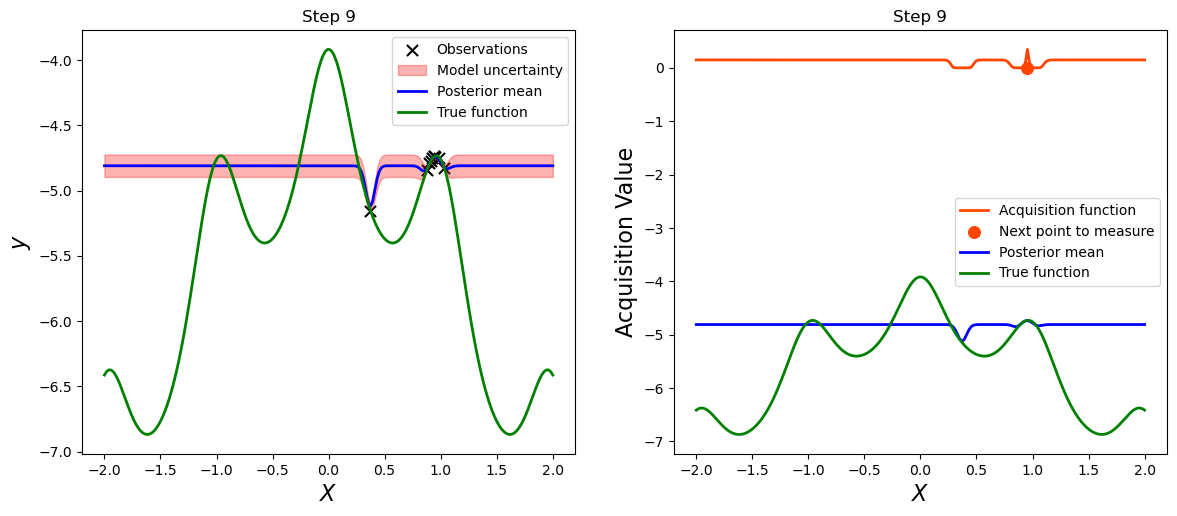


Step 10/50


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


Best y value: -4.73313570022583


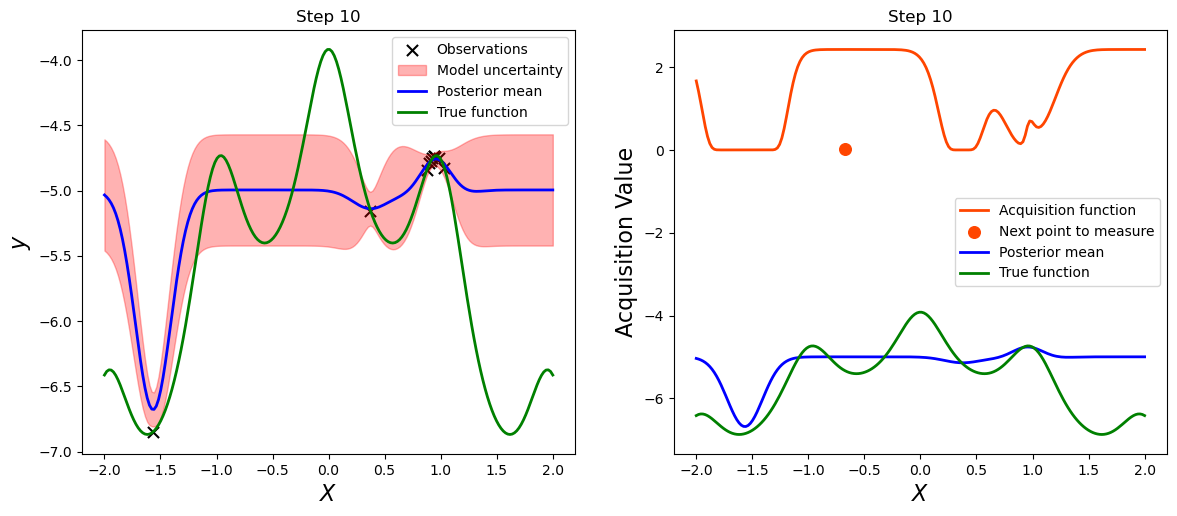


Step 11/50
Best y value: -4.73313570022583


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


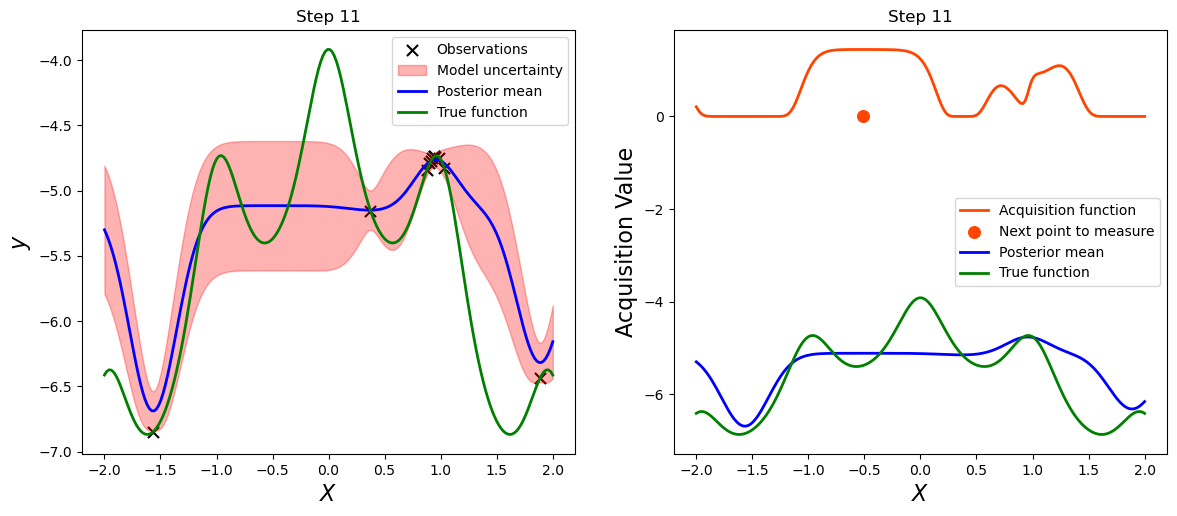


Step 12/50
Best y value: -4.73313570022583


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


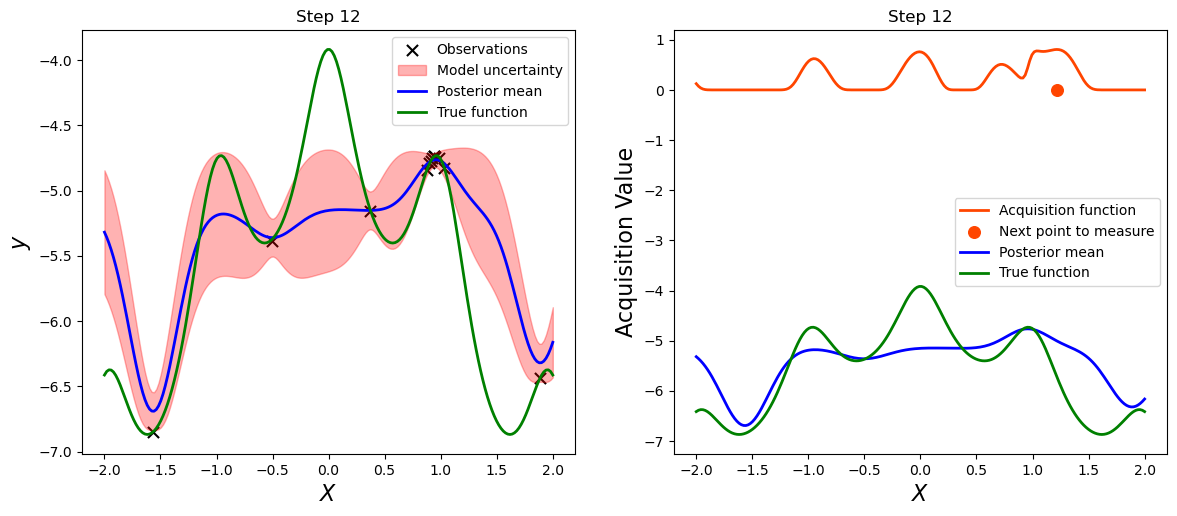


Step 13/50
Best y value: -4.73313570022583


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


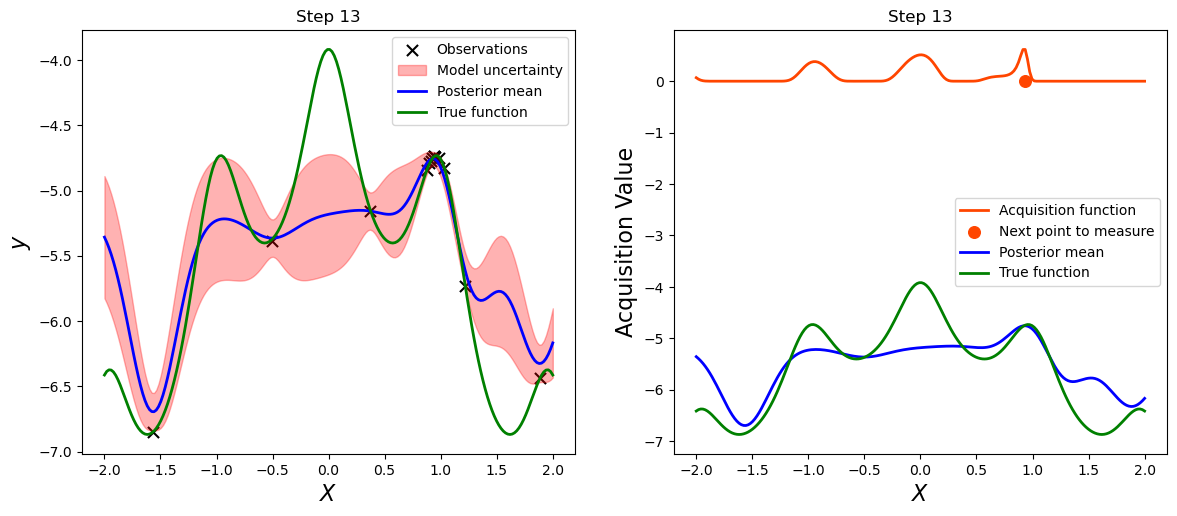


Step 14/50
Best y value: -3.921724557876587


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


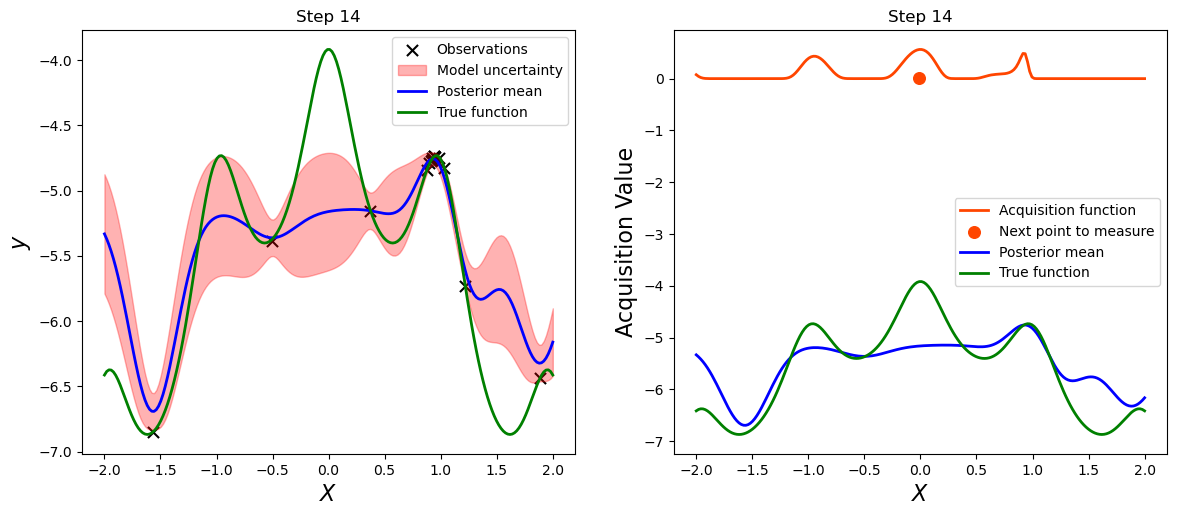


Step 15/50
Best y value: -3.921724557876587


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


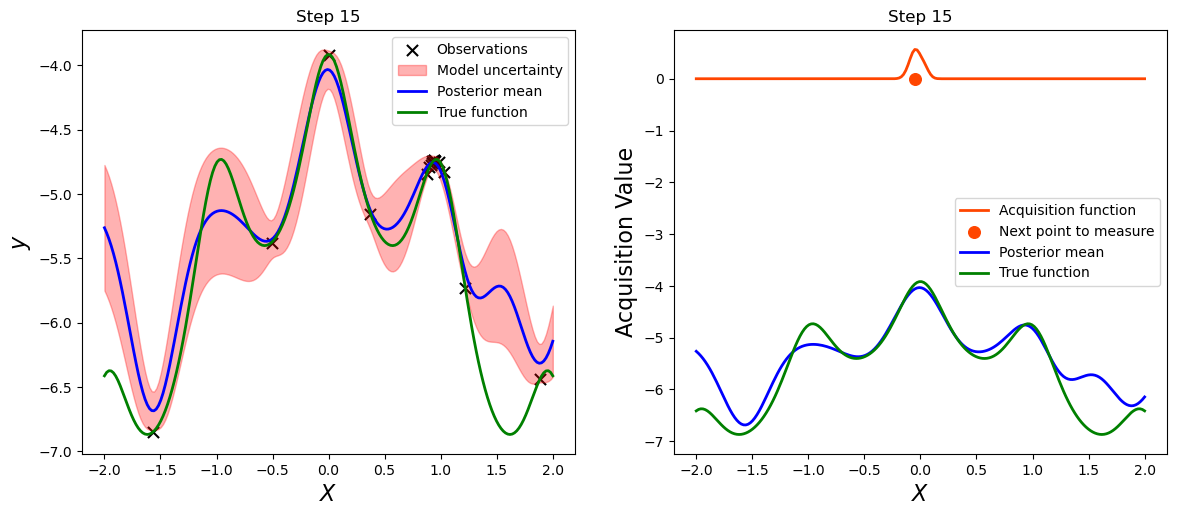


Step 16/50
Best y value: -3.921724557876587


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


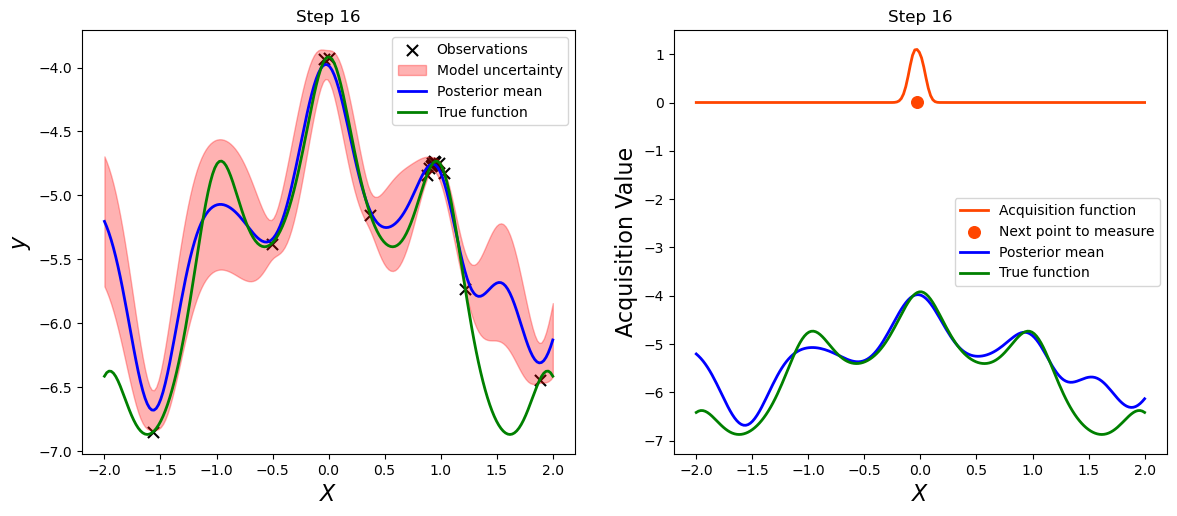


Step 17/50
Best y value: -3.9159529209136963


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


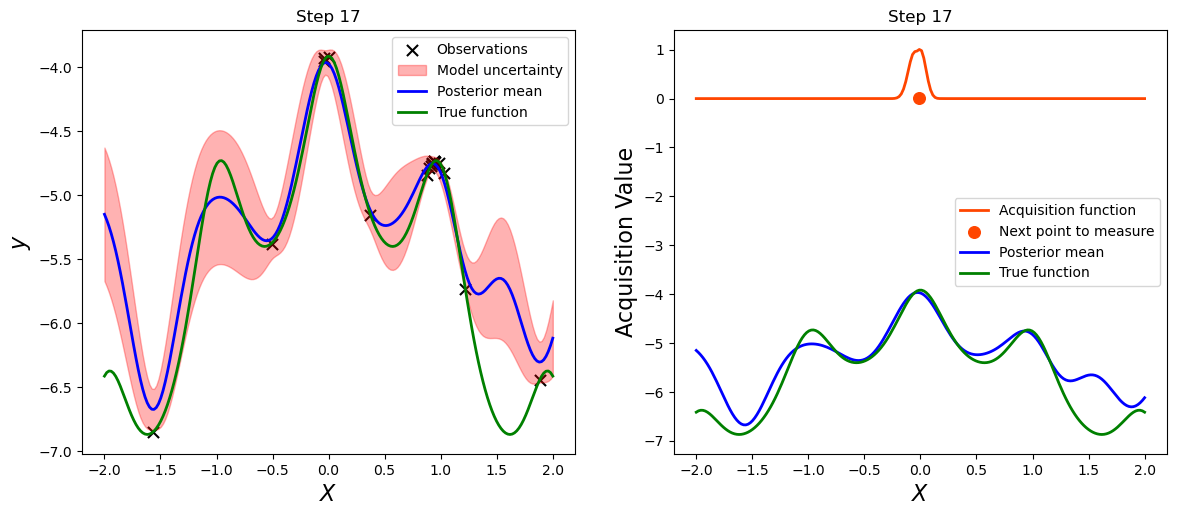


Step 18/50
Best y value: -3.9159529209136963


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


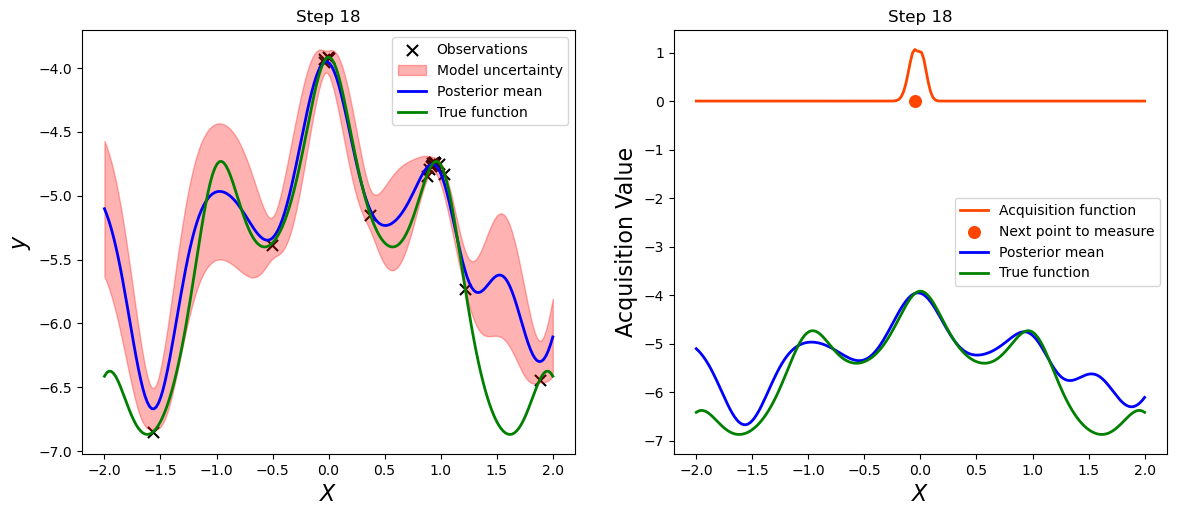


Step 19/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


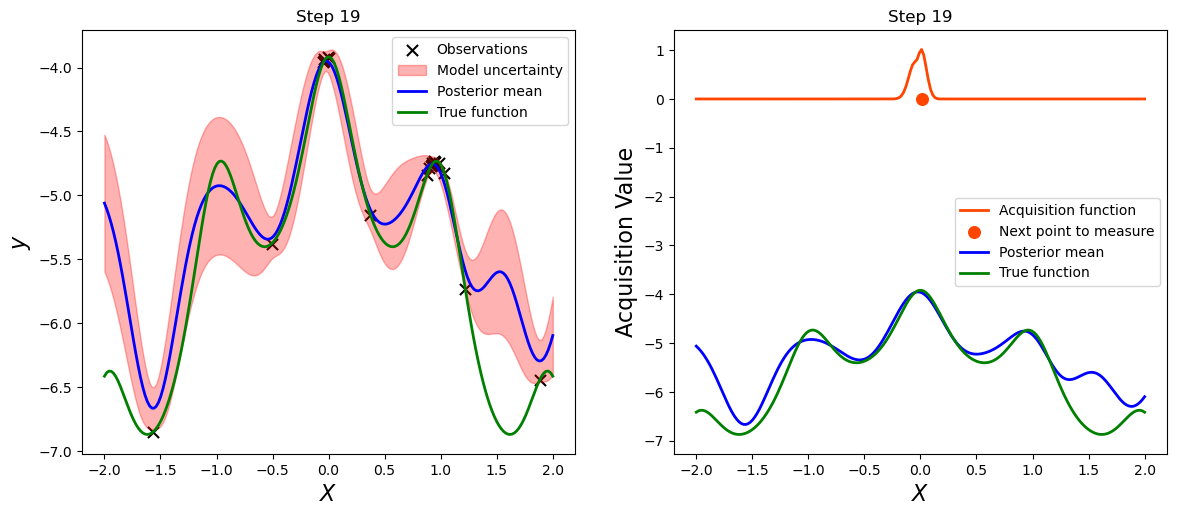


Step 20/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


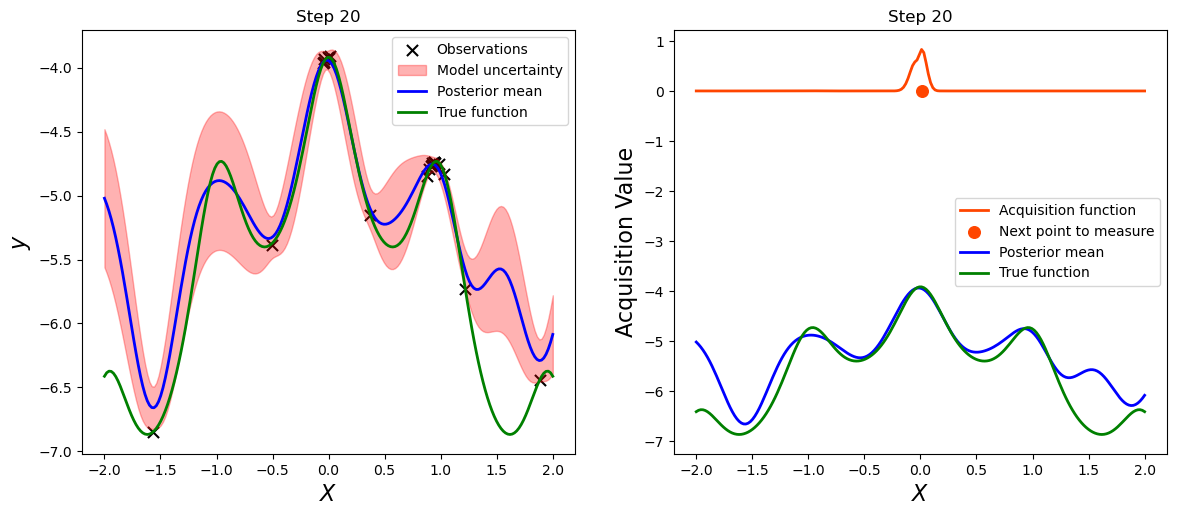


Step 21/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


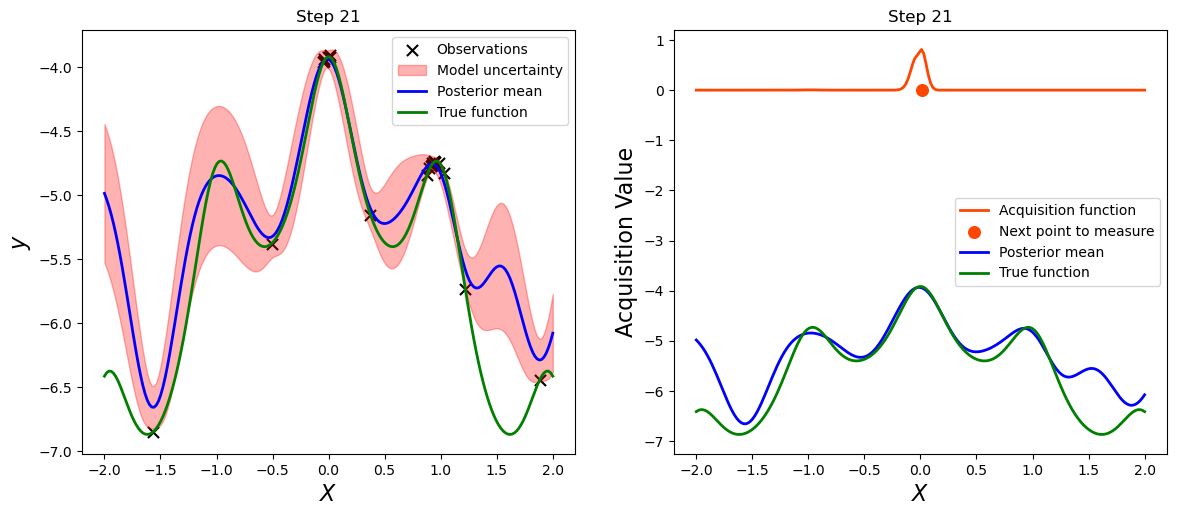


Step 22/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


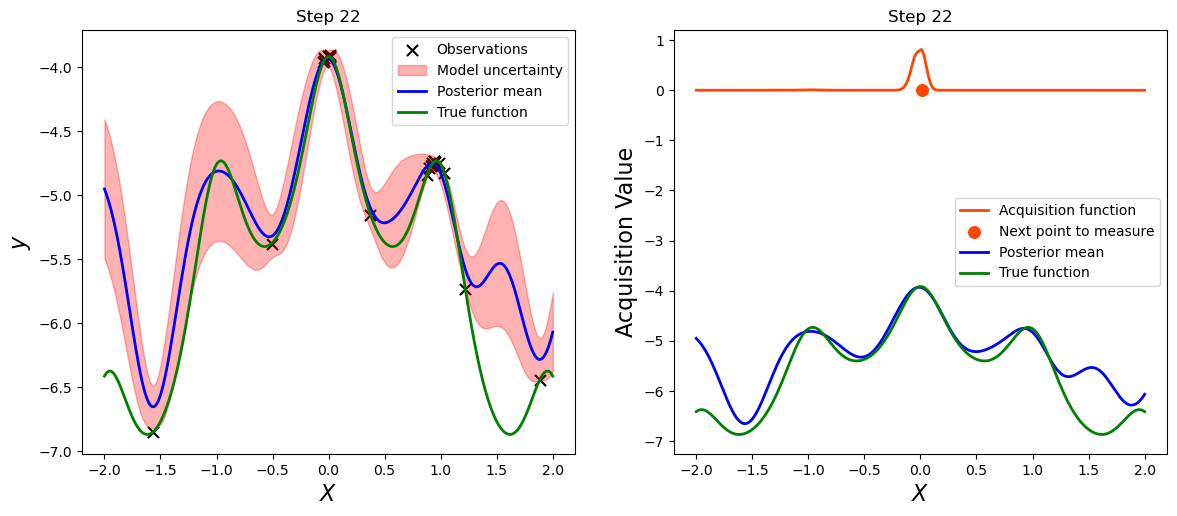


Step 23/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


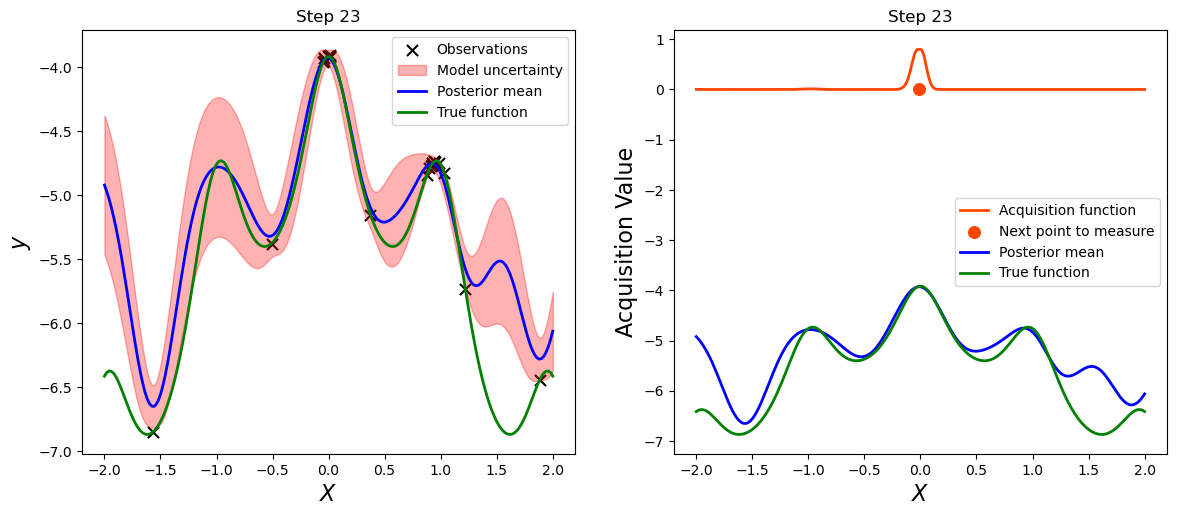


Step 24/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


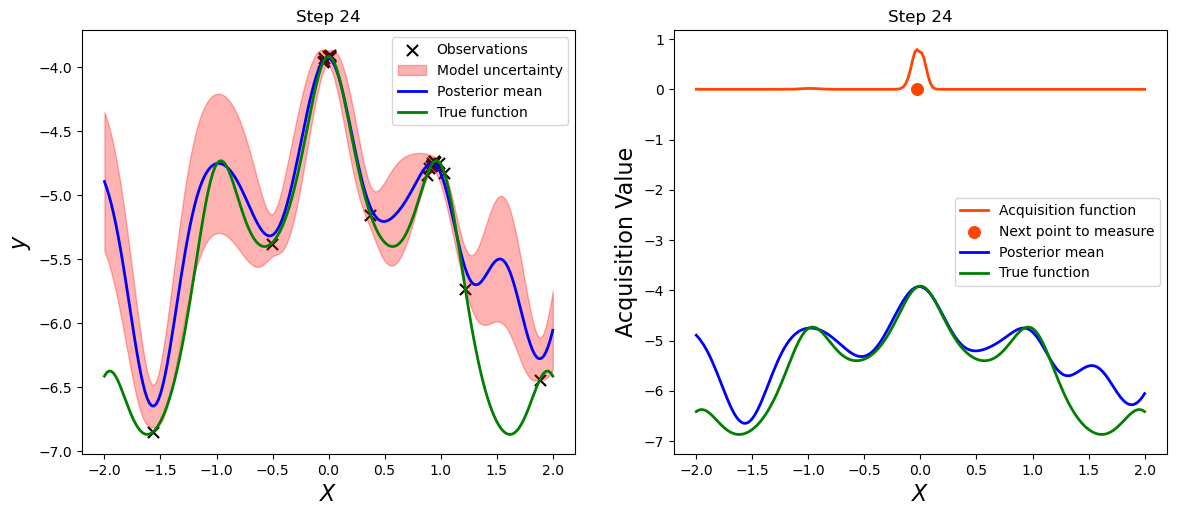


Step 25/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


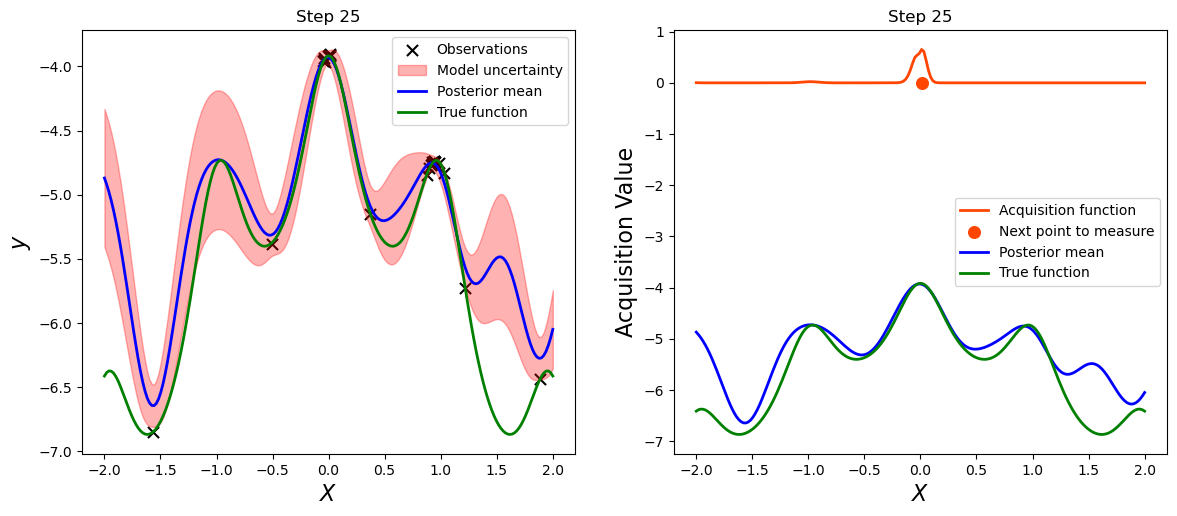


Step 26/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


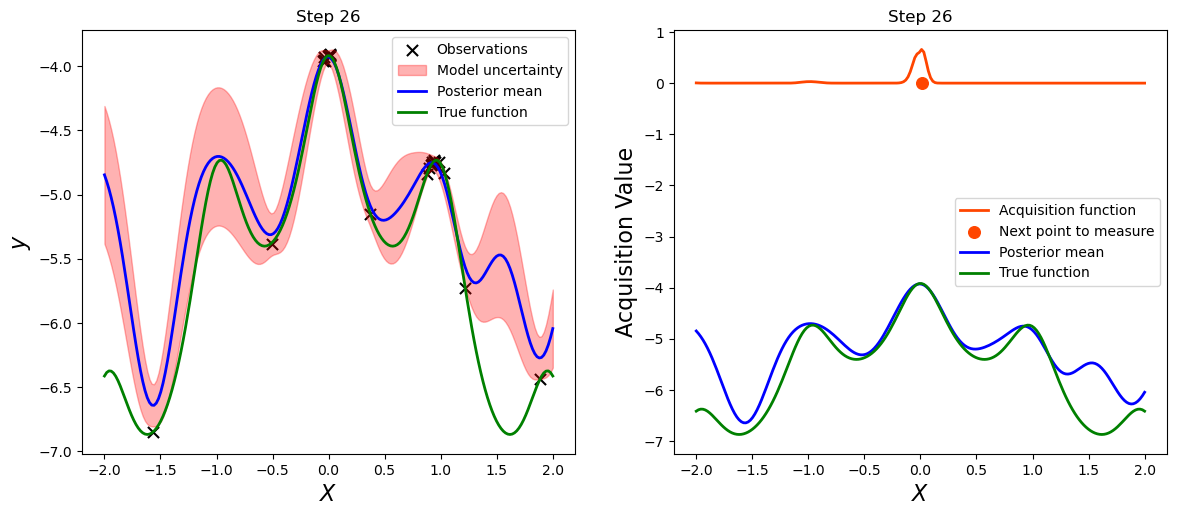


Step 27/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


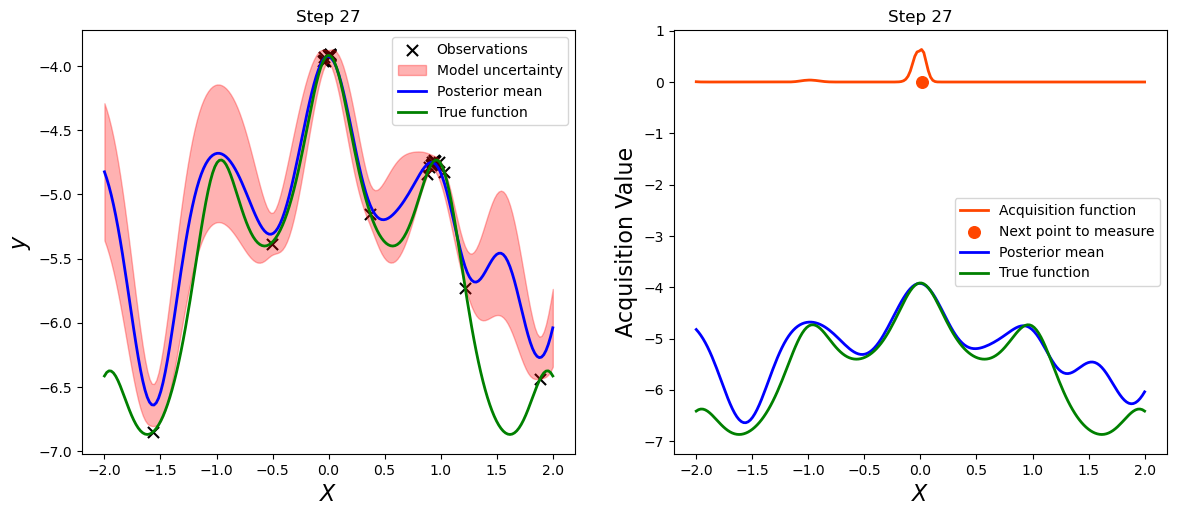


Step 28/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


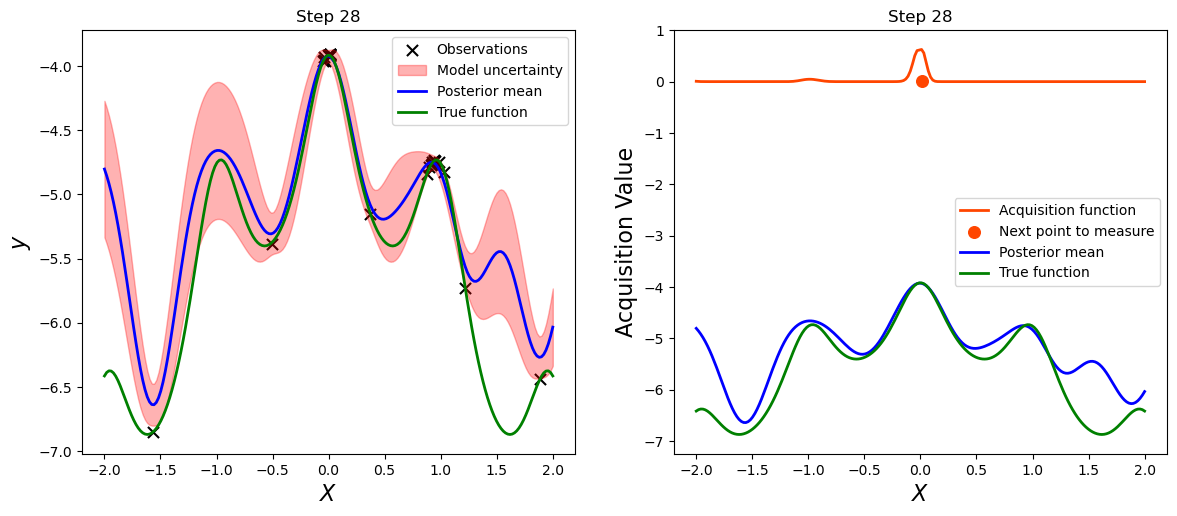


Step 29/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


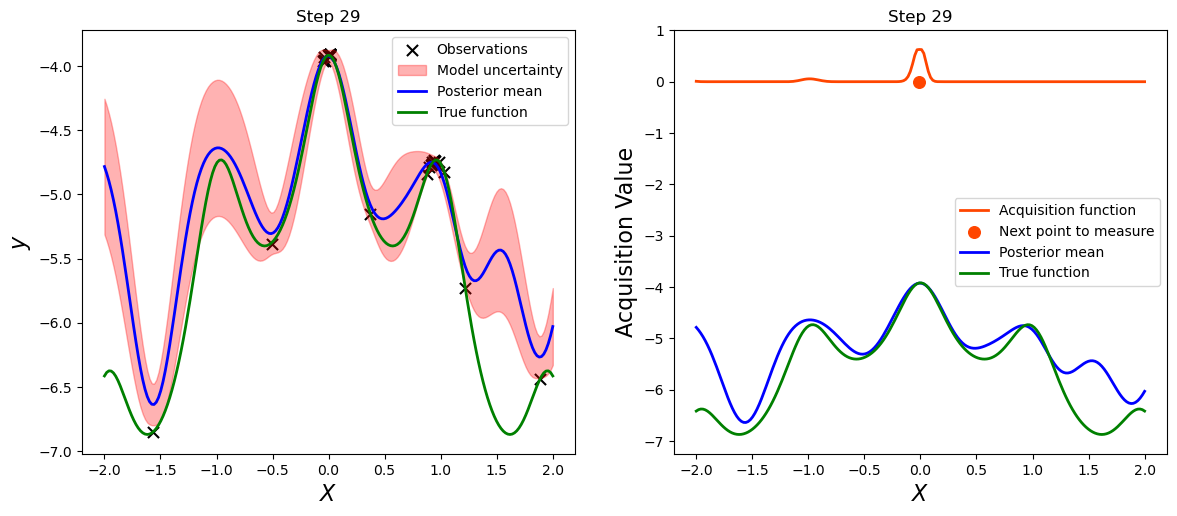


Step 30/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


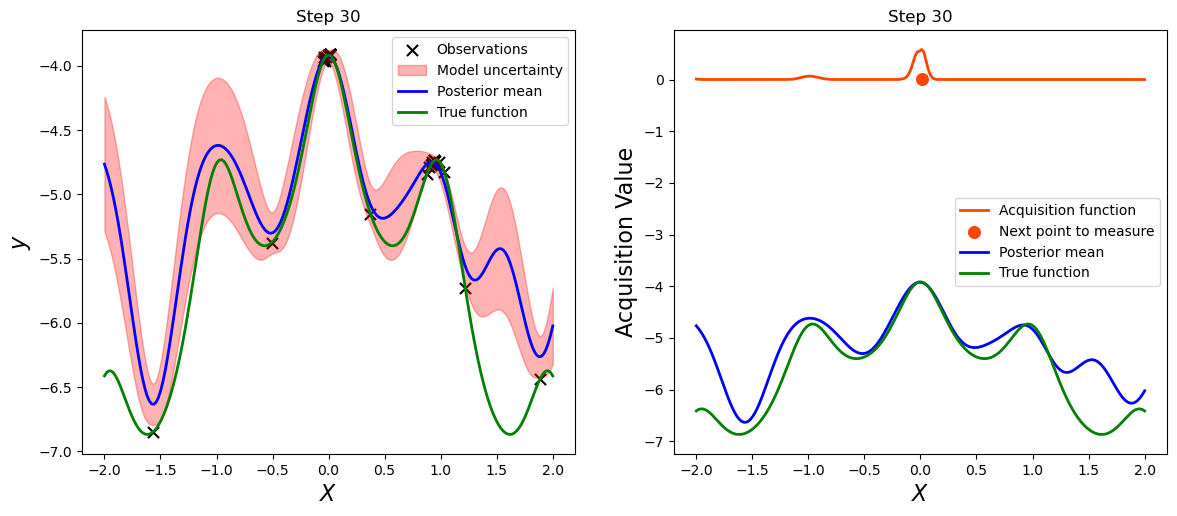


Step 31/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


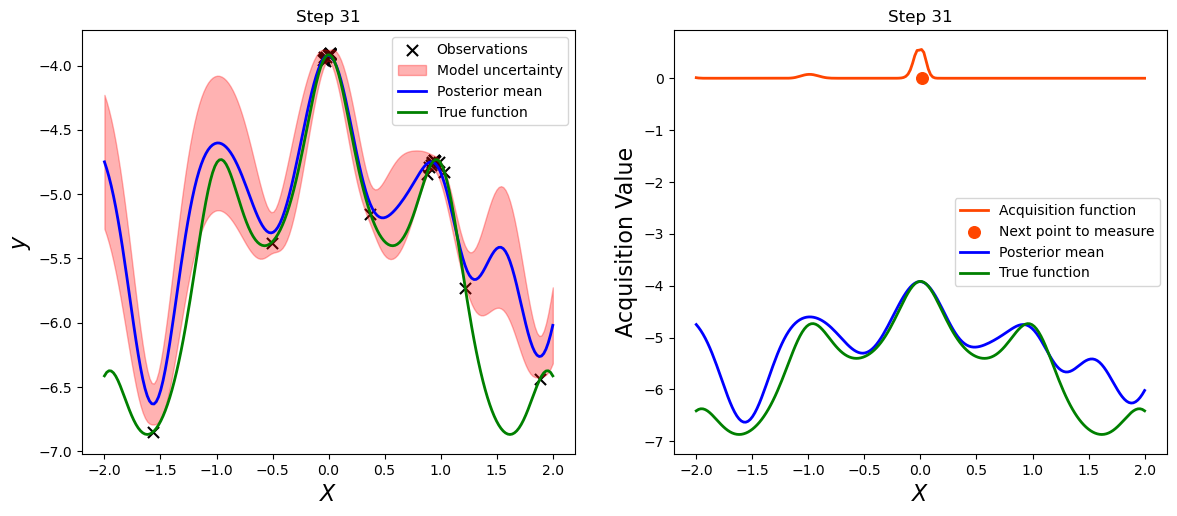


Step 32/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


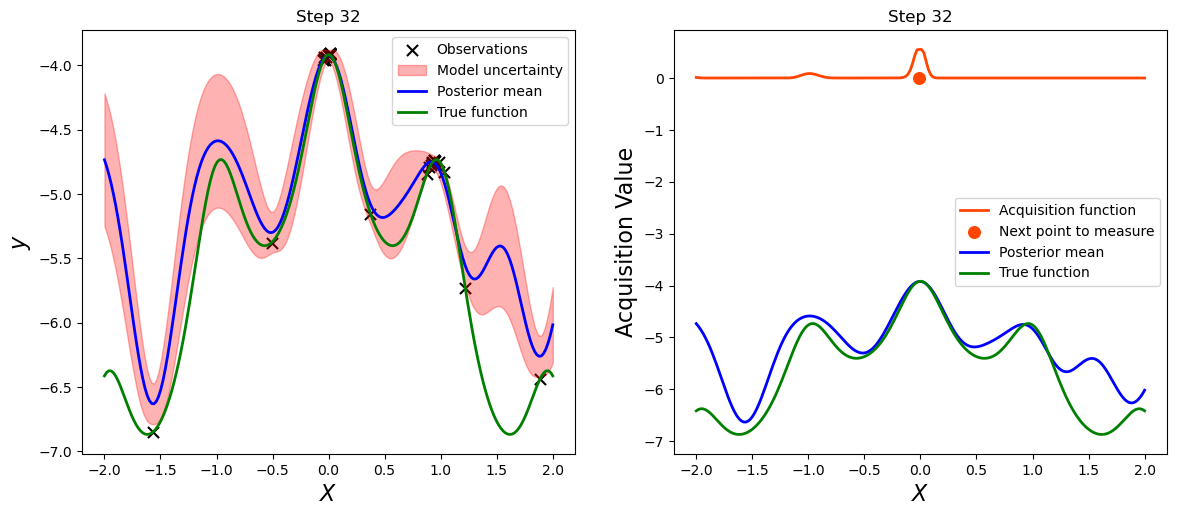


Step 33/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


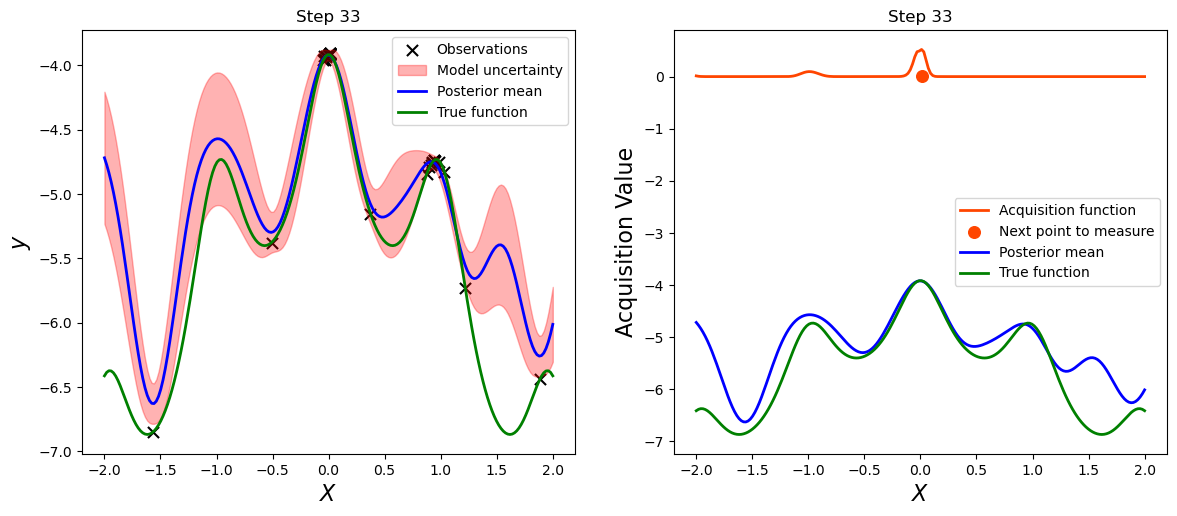


Step 34/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


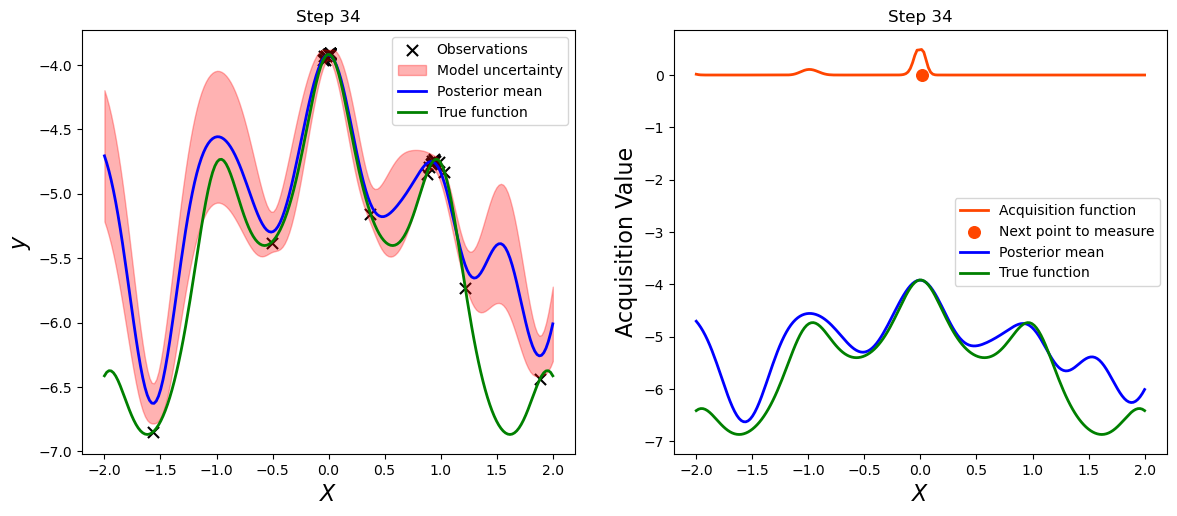


Step 35/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


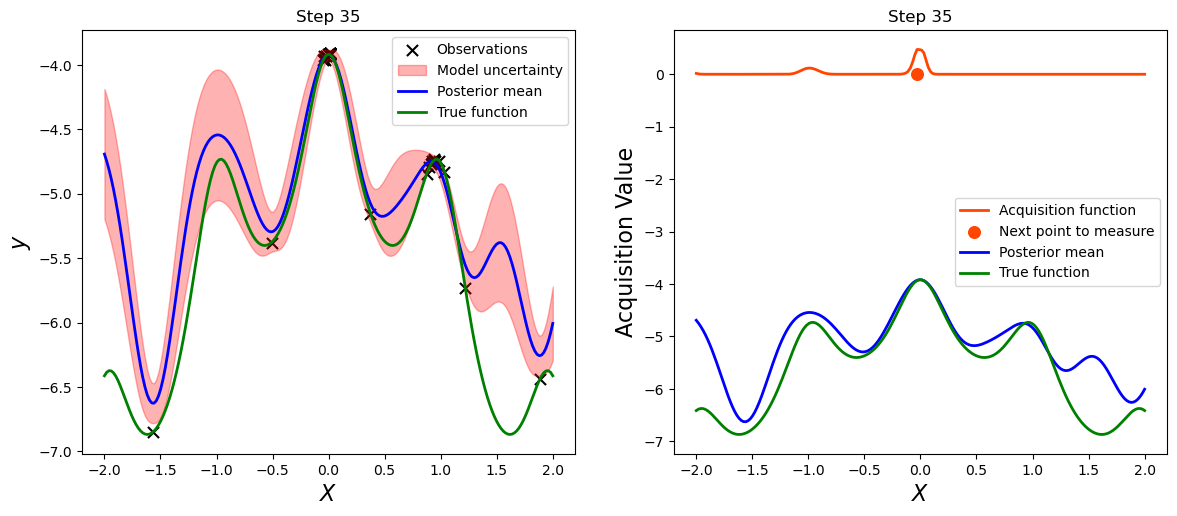


Step 36/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


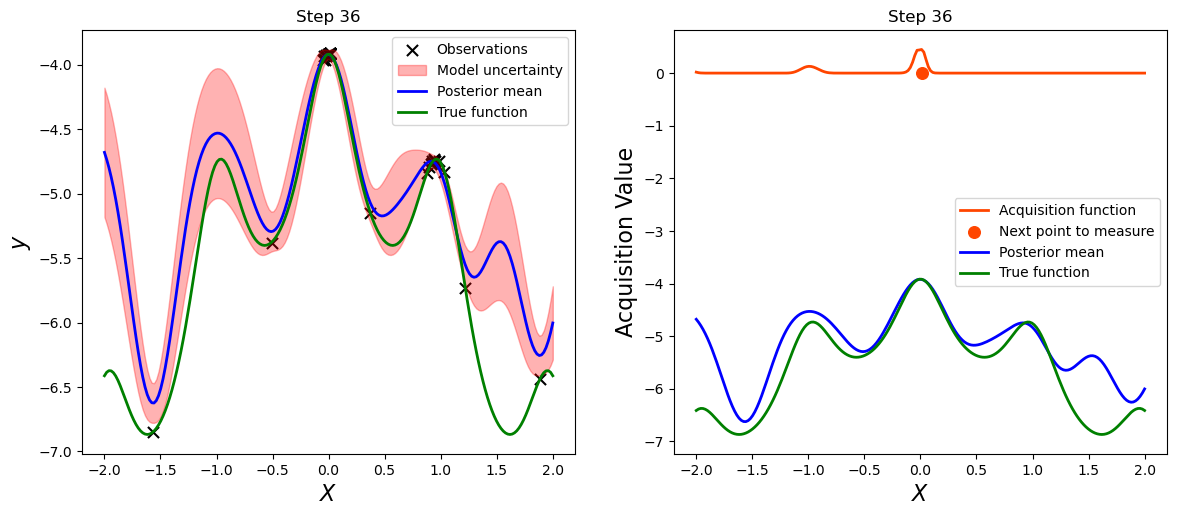


Step 37/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


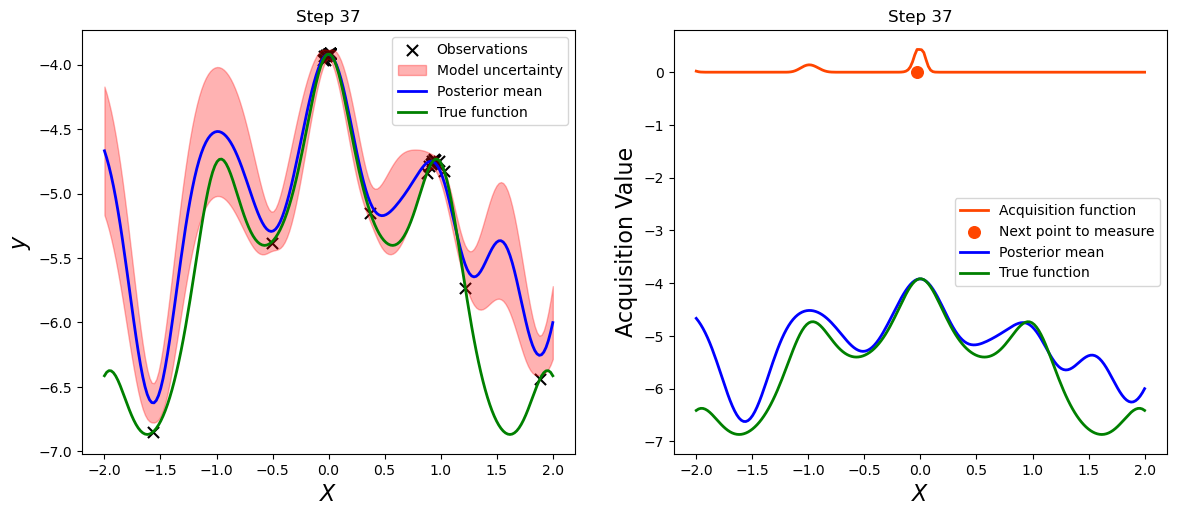


Step 38/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


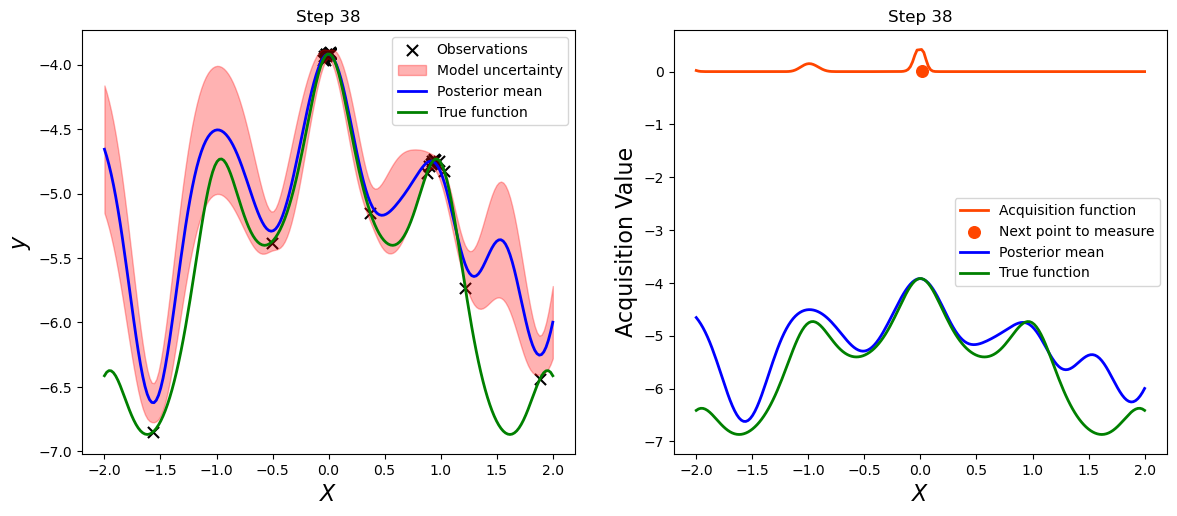


Step 39/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


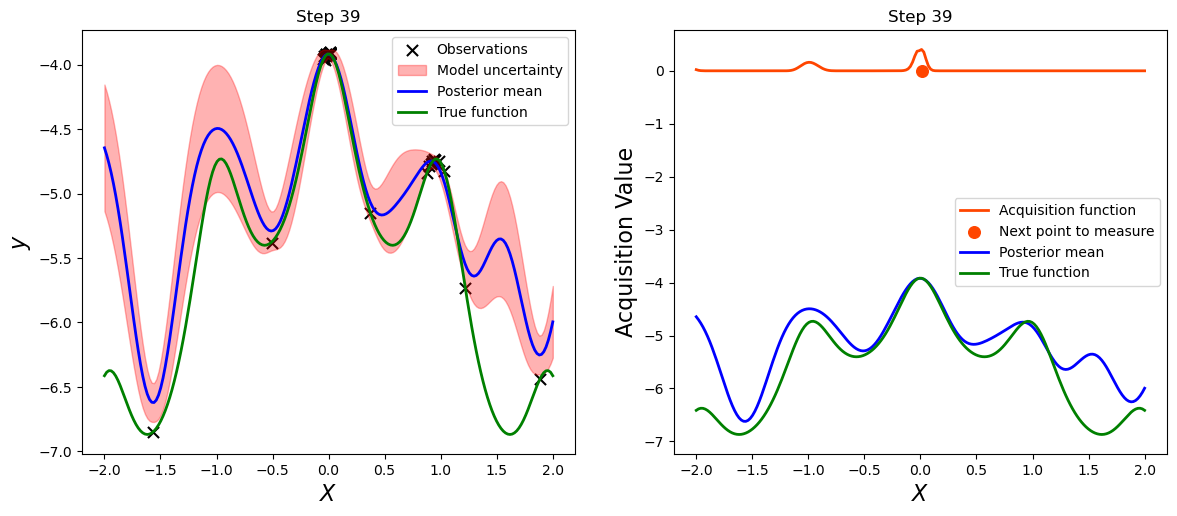


Step 40/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


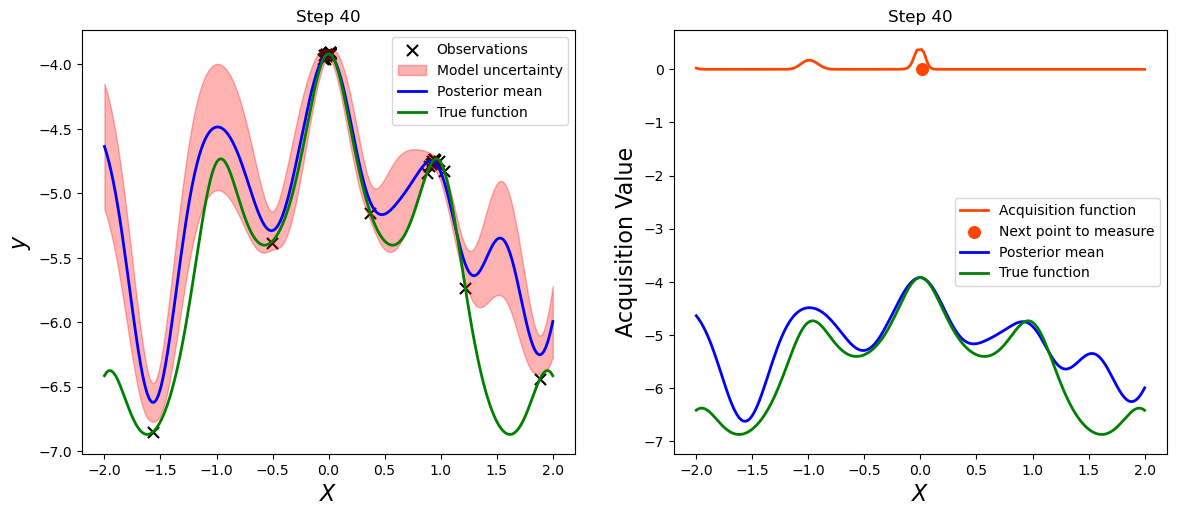


Step 41/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


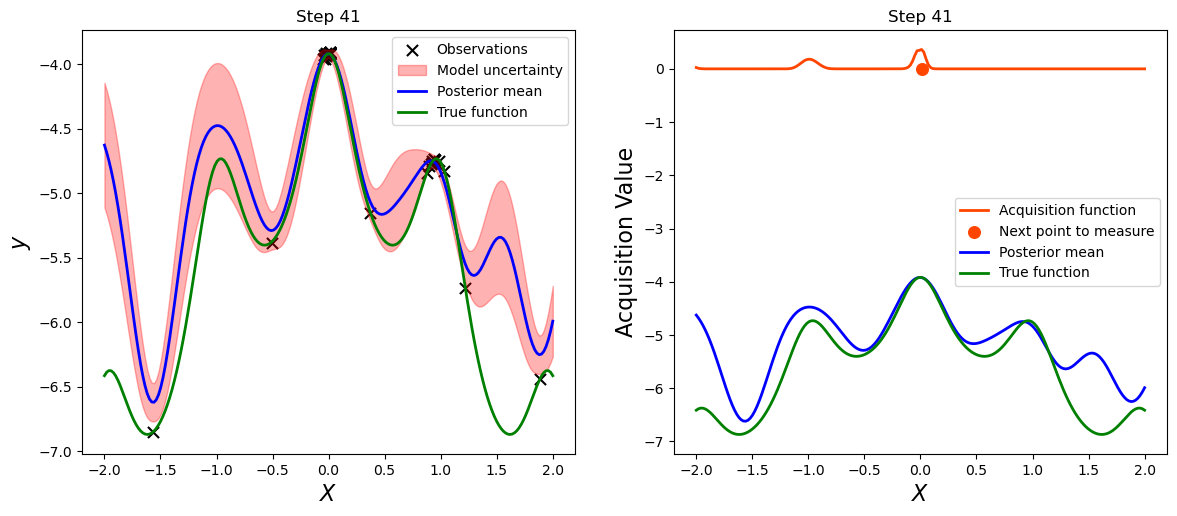


Step 42/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


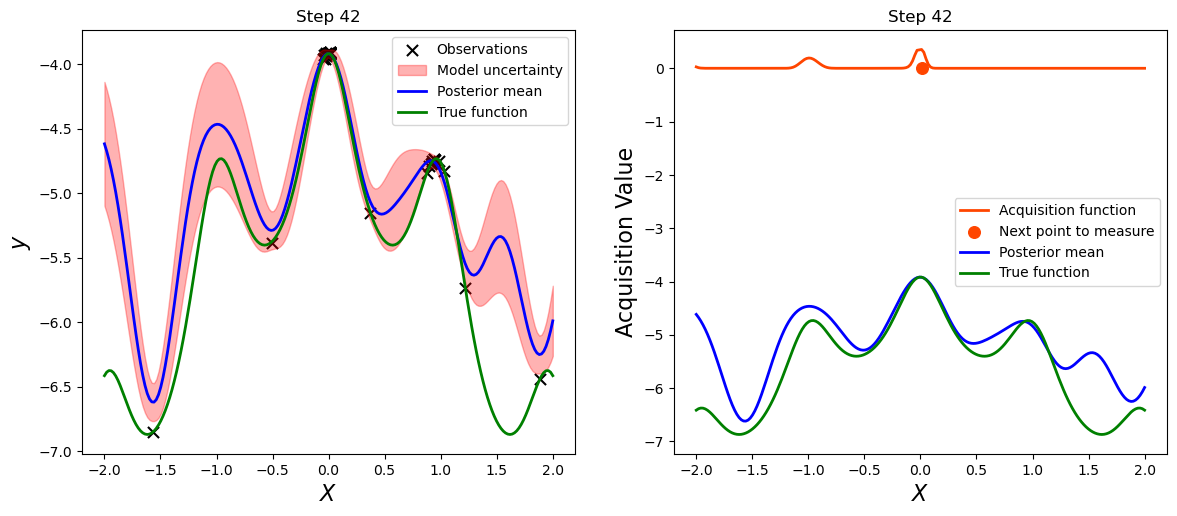


Step 43/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


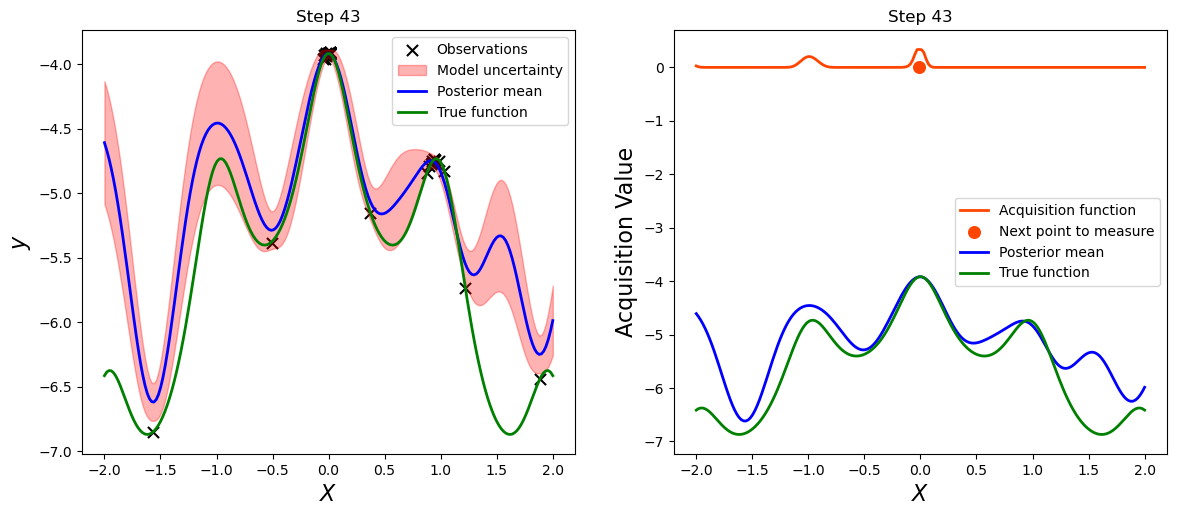


Step 44/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


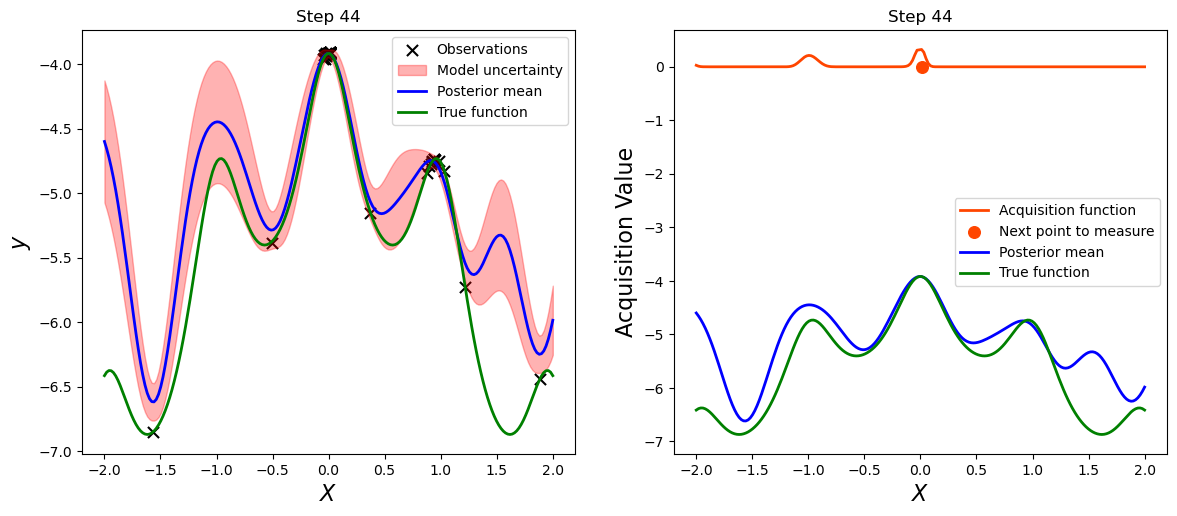


Step 45/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


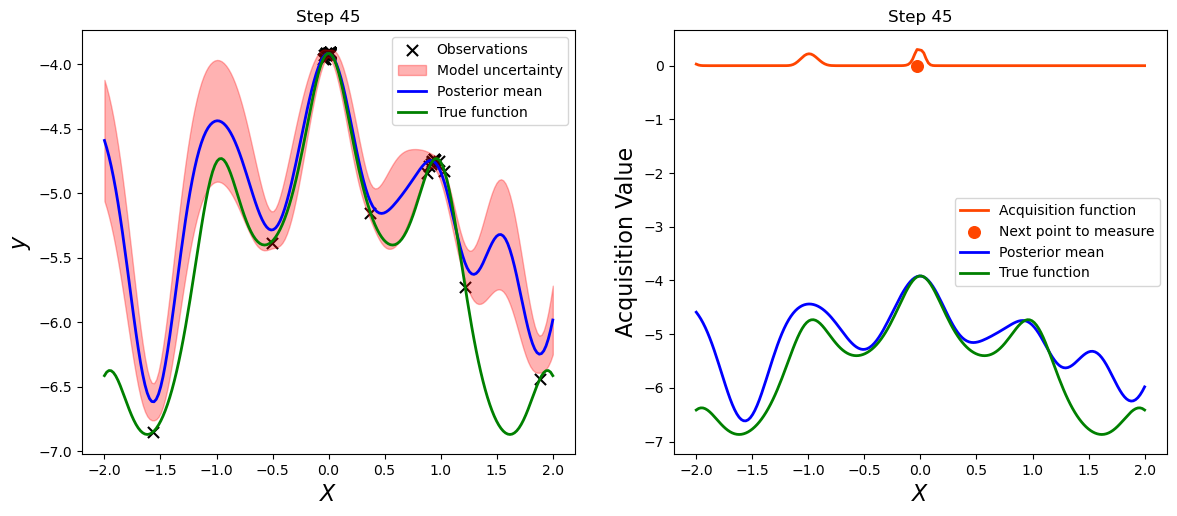


Step 46/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


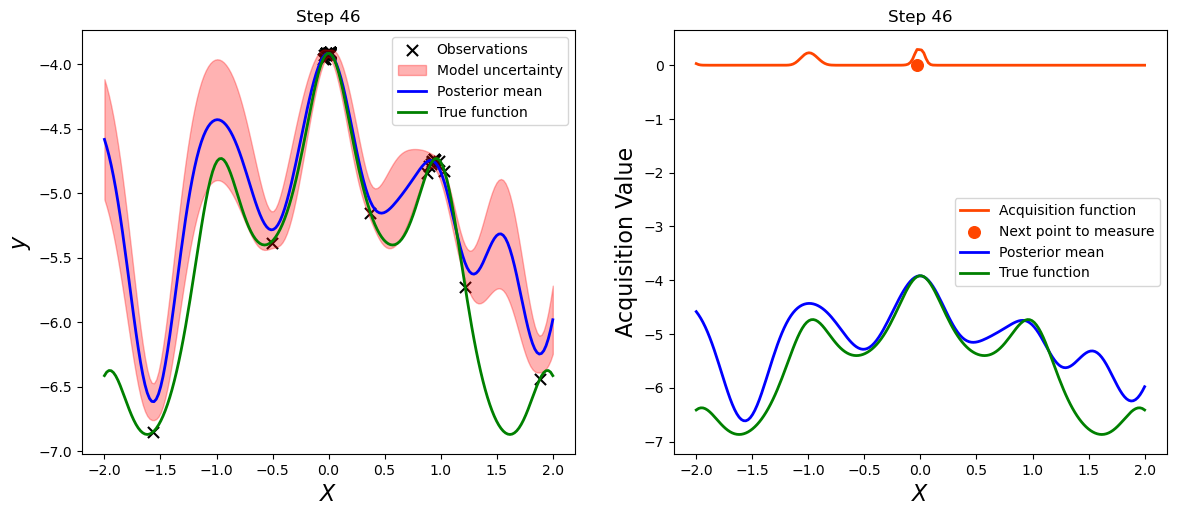


Step 47/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


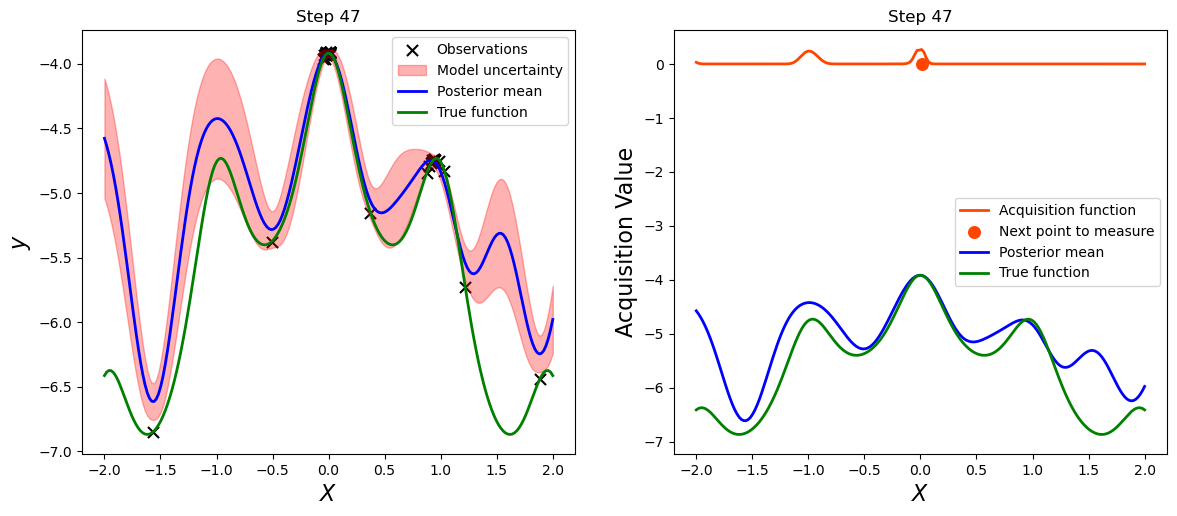


Step 48/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


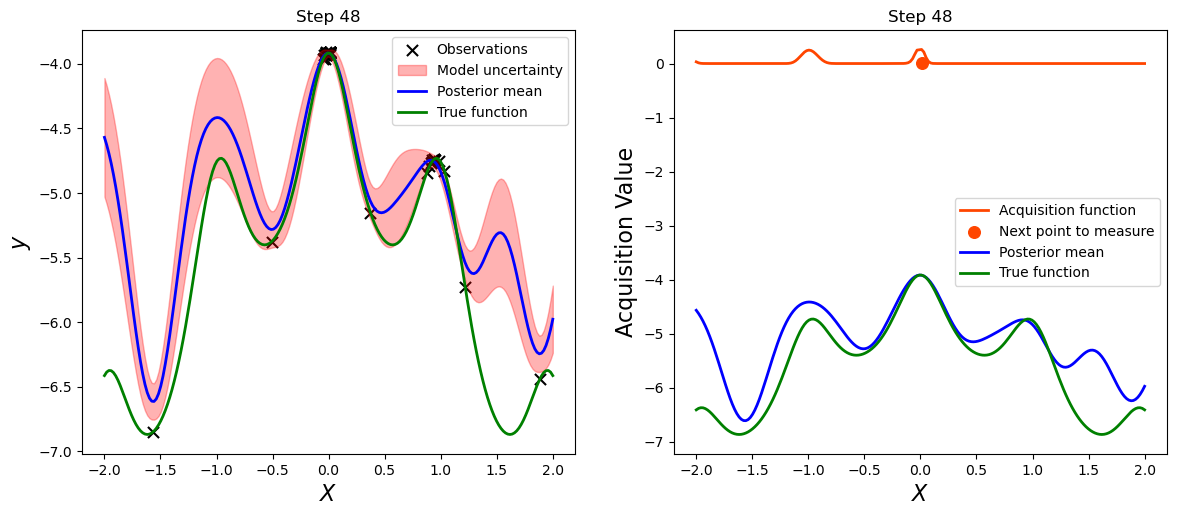


Step 49/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


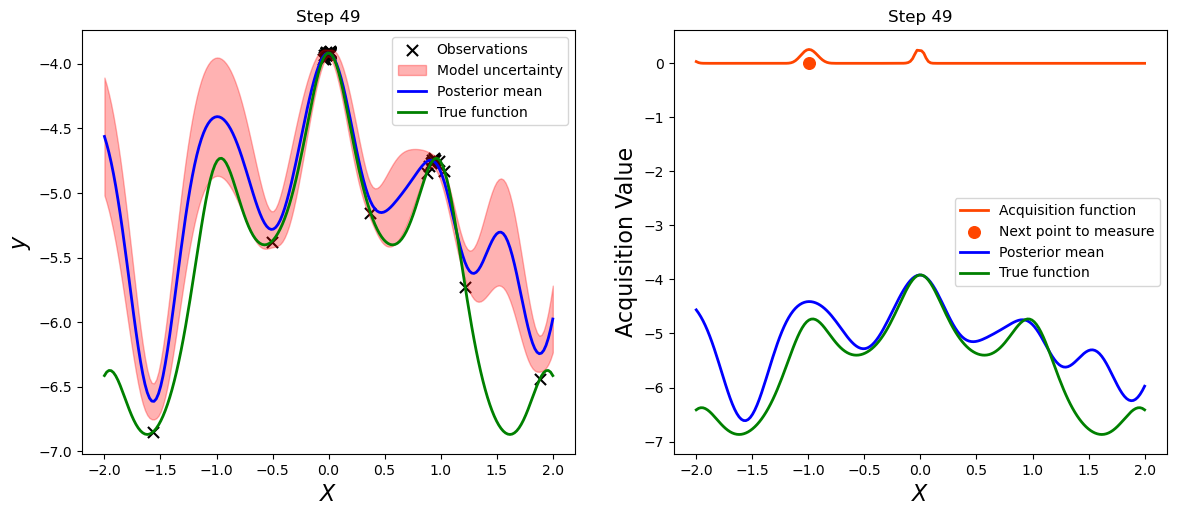


Step 50/50
Best y value: -3.9051756858825684


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


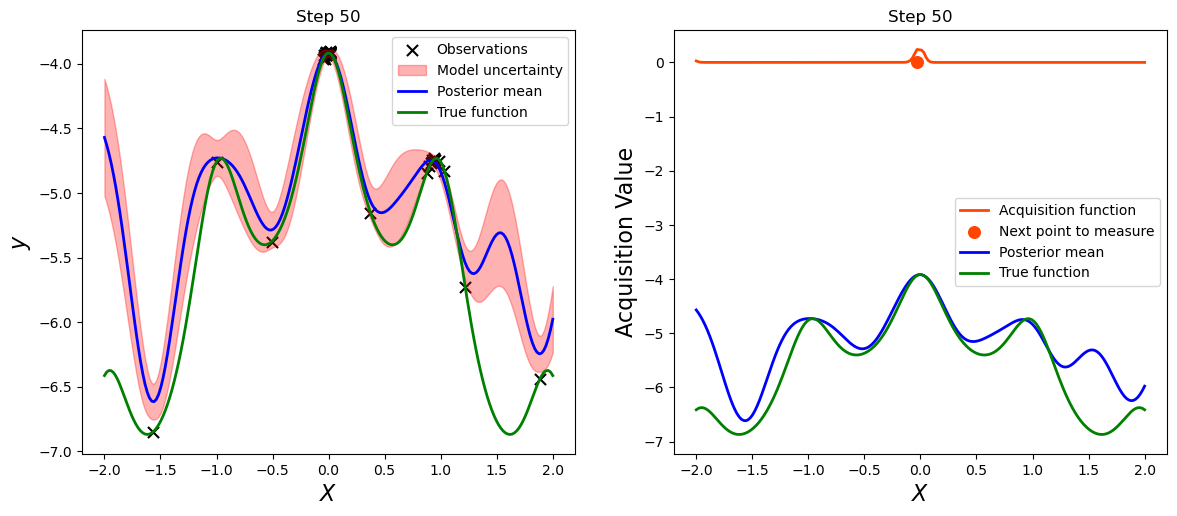

Script execution time: 0.25 min


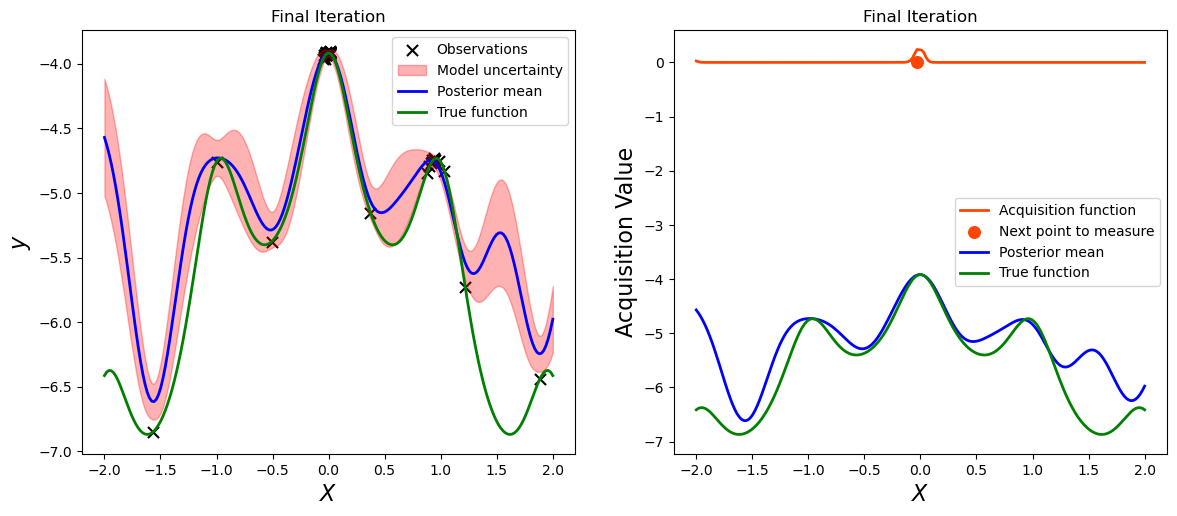

In [11]:
print('Initial model parameters')
    
likelihood = gpytorch.likelihoods.GaussianLikelihood(
    noise_constraint=gpytorch.constraints.GreaterThan(1e-4),
)

model = FancyGPWithPriors(train_x, train_y, likelihood)

hypers = {
    'likelihood.noise_covar.noise': torch.tensor(noise),
    'covar_module.base_kernel.lengthscale': torch.tensor(lengthscale),
    'covar_module.outputscale': torch.tensor(outputscale),
}

model.initialize(**hypers)
print(
    model.likelihood.noise_covar.noise.item(),
    model.covar_module.base_kernel.lengthscale.item(),
    model.covar_module.outputscale.item()
)

model_init_p1 = round(model.likelihood.noise_covar.noise.item(), 2)
model_init_p2 = round(model.covar_module.base_kernel.lengthscale.item(), 1)
model_init_p3 = round(model.covar_module.outputscale.item(), 1)

model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(-2, 2, 200)
    observed_pred_untrain = likelihood(model(test_x))

with torch.no_grad():
    lower_init, upper_init = observed_pred_untrain.confidence_region()

training_iter = 20

model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))

with torch.no_grad():  
    lower, upper = observed_pred.confidence_region()

init_x = train_x.unsqueeze(1)
init_y = train_y.unsqueeze(1)
best_init_y = train_y.max().item()
bounds = torch.tensor([[-2.],[2.]])

start_time = time.time()

num_steps = 50  # number of Bayesian optimization steps

# Ensure the Results folder exists
os.makedirs('Results', exist_ok=True)

for e in range(num_steps):
    print("\nStep {}/{}".format(e + 1, num_steps))
    
    # Bayesian optimization step
    new_candidates, ac_values, model_final, ac_func = get_next_points(init_x, init_y, best_init_y, model, likelihood, bounds, batch_size=1)
    new_results = measure(new_candidates)
    
    init_x = torch.cat([init_x, new_candidates])
    init_y = torch.cat([init_y, new_results])

    best_init_y = init_y.max().item()
    print("Best y value:", best_init_y)
    
    # Generate plot for this iteration
    xx = torch.linspace(-2, 2, 200).unsqueeze(-1)
    x = init_x.numpy()
    y = init_y.numpy()
    
    with torch.no_grad():
        posterior = model_final.posterior(X=xx.unsqueeze(1))
        
    ymean = posterior.mean.squeeze(-1).numpy()
    yvar = posterior.variance.squeeze(-1).numpy()
    acq = ac_func(xx.unsqueeze(1)).detach().numpy()
    
    # Get bounds for uncertainty
    lower_b = ymean - 1.96 * np.sqrt(yvar)
    upper_b = ymean + 1.96 * np.sqrt(yvar)
    
    # Compute true function values
    true_function_values = target_function2(xx).numpy()
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 5.5))
    
    ax1.scatter(x[:-1], y[:-1], marker='x', c='k', label="Observations", s=64)
    ax1.fill_between(xx.squeeze().numpy(), lower_b.squeeze(), upper_b.squeeze(), color='r', alpha=0.3, label="Model uncertainty")
    ax1.plot(xx.squeeze().numpy(), ymean, lw=2, c='b', label='Posterior mean')
    ax1.plot(xx.squeeze().numpy(), true_function_values, lw=2, c='g', label='True function')
    ax1.set_xlabel("$X$", fontsize=16)
    ax1.set_ylabel("$y$", fontsize=16)
    ax1.legend(loc='best', fontsize=10)
    ax1.set_title(f'Step {e + 1}')
    
    idx = acq.argmax()
    ax2.plot(xx.squeeze().numpy(), 200*acq, lw=2, c='orangered', label='Acquisition function')
    ax2.scatter(xx.squeeze().numpy()[idx], acq[idx], s=70, c='orangered', label='Next point to measure')
    ax2.plot(xx.squeeze().numpy(), ymean, lw=2, c='b', label='Posterior mean')
    ax2.plot(xx.squeeze().numpy(), true_function_values, lw=2, c='g', label='True function')
    ax2.set_xlabel("$X$", fontsize=16)
    ax2.set_ylabel("Acquisition Value", fontsize=16)
    ax2.legend(loc='best', fontsize=10)
    ax2.set_title(f'Step {e + 1}')
    
    plt.savefig(f'Results/iteration_{e + 1}.png')
    plt.show()
    plt.close(fig)  # Close the figure to free up memory

end_time = time.time()
running_time = end_time - start_time

print("Script execution time: {:.2f} min".format(round(running_time/60, 2)))

# Final plot after all iterations
xx = torch.linspace(-2, 2, 200).unsqueeze(-1)
x = init_x.numpy()
y = init_y.numpy()

with torch.no_grad():
    posterior = model_final.posterior(X=xx.unsqueeze(1))
    
ymean = posterior.mean.squeeze(-1).numpy()
yvar = posterior.variance.squeeze(-1).numpy()
acq = ac_func(xx.unsqueeze(1)).detach().numpy()

# Get bounds for uncertainty
lower_b = ymean - 1.96 * np.sqrt(yvar)
upper_b = ymean + 1.96 * np.sqrt(yvar)

# Compute true function values
true_function_values = target_function2(xx).numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 5.5))

ax1.scatter(x, y, marker='x', c='k', label="Observations", s=64)
ax1.fill_between(xx.squeeze().numpy(), lower_b.squeeze(), upper_b.squeeze(), color='r', alpha=0.3, label="Model uncertainty")
ax1.plot(xx.squeeze().numpy(), ymean, lw=2, c='b', label='Posterior mean')
ax1.plot(xx.squeeze().numpy(), true_function_values, lw=2, c='g', label='True function')
ax1.set_xlabel("$X$", fontsize=16)
ax1.set_ylabel("$y$", fontsize=16)
ax1.legend(loc='best', fontsize=10)
ax1.set_title('Final Iteration')

idx = acq.argmax()
ax2.plot(xx.squeeze().numpy(), 200*acq, lw=2, c='orangered', label='Acquisition function')
ax2.scatter(xx.squeeze().numpy()[idx], acq[idx], s=70, c='orangered', label='Next point to measure')
ax2.plot(xx.squeeze().numpy(), ymean, lw=2, c='b', label='Posterior mean')
ax2.plot(xx.squeeze().numpy(), true_function_values, lw=2, c='g', label='True function')
ax2.set_xlabel("$X$", fontsize=16)
ax2.set_ylabel("Acquisition Value", fontsize=16)
ax2.legend(loc='best', fontsize=10)
ax2.set_title('Final Iteration')

plt.savefig('Results/final_iteration.png')
plt.show()
plt.close(fig)